In [1]:
#from Interval_v4 import *
import cv2
import json
# import concurrent.futures
# from itertools import repeat
from IPython.display import clear_output

In [14]:
# import numpy as np
# from sympy.geometry import Point,Circle,Segment,intersection,Line
# import matplotlib.pyplot as plt
# from matplotlib.patches import Arc as Arc_patch
# from matplotlib import collections  as mc

# class Arc:
#     def __init__(self,r,theta1,theta2,origin = (0,0)):
#         x,y = origin
#         self.x = x
#         self.y = y
#         self.r = r
#         self.origin = origin
#         self.theta1 = theta1
#         self.theta2 = theta2
#         self.endpoints = [Point(self.x+r*np.cos(theta1),self.y+r*np.sin(theta1)),Point(self.x+r*np.cos(theta2),self.y+r*np.sin(theta2))]
#         self.circle = Circle(Point(x,y),r)  
        
#     def __contains__(self,point):
#         xp,yp = float(point.x)-self.x,float(point.y)-self.y
#         rot = np.array([[np.cos(self.theta1),-1*np.sin(self.theta1)],
#                         [np.sin(self.theta1),np.cos(self.theta1)]])
#         xp,yp = np.array([xp,yp]) @ rot
#         theta = np.arctan2(yp,xp) if (yp>=0 or (self.theta1<=0 and self.theta2>=0) or (self.theta2<=0 and self.theta1>=0)) else 2*np.pi + np.arctan2(yp,xp)
#         return (theta>=0 and theta<=self.theta2-self.theta1) or (theta>=self.theta2-self.theta1 and theta<=0)

#     def draw(self,ax,color):
#         ax.add_patch(Arc_patch((self.x, self.y), 2*self.r,2*self.r, theta1=np.rad2deg(self.theta1), theta2=np.rad2deg(self.theta2), linewidth=1, color=color))       

# #intersections
# def arc_arc(gamma2,gamma2prime):
#     eta,etaprime = gamma2.circle,gamma2prime.circle
#     intersect = intersection(eta,etaprime)
#     pts = []
#     if len(intersect) > 0:
#         if intersect[0] in gamma2 and intersect[0] in gamma2prime:
#             pts.append(intersect[0])
#     if len(intersect) > 1:
#         if intersect[1] in gamma2 and intersect[1] in gamma2prime:
#             pts.append(intersect[1])    
        
#     return pts

# def line_line(l1,l2):
#     return intersection(l1,l2)

# def line_arc(l1prime,gamma2):
#     intersect = intersection(l1prime,gamma2.circle)
#     pts = []
#     if len(intersect)>0:
#         if intersect[0] in gamma2:
#             pts.append(intersect[0])
#     if len(intersect)>1:
#         if intersect[1] in gamma2:
#             pts.append(intersect[1]) 
#     return pts        
       
    

# class Interval:
#     """
#     Defined by r1,r2,theta1,theta2 and the origin.
#     r1<r2 and theta1<theta2
#     """
#     def __init__(self,r1,r2,theta1,theta2,origin=(0,0)):
# #         full_circle = lambda theta:theta - (theta//(2*np.pi))*2*np.pi 
# #         theta1 = full_circle(theta1)
# #         theta2 = full_circle(theta2)
#         not_zero = lambda x: x if x != 0.0 else 1e-6    
#         r1,r2,theta1,theta2 =  list(map(not_zero,[r1,r2,theta1,theta2])) 
# #         delta = abs(theta2-theta1)
# #         theta2 = max(theta1,theta2)
# #         theta2 = theta2%(2*np.pi)
# #         theta1 = theta2 - delta   
#         theta1,theta2 = self.correction(theta1,theta2)
         
        
#         self.r1 = r1
#         self.r2 = r2  
#         self.theta1 = theta1
#         self.theta2 = theta2
#         #print("self.theta2 = ",self.theta2)
#         x,y = origin
#         self.origin = origin
#         self.x = x
#         self.y = y
#         self.gamma1 = Arc(r1,theta1,theta2,origin=origin)
#         self.gamma2 = Arc(r2,theta1,theta2,origin=origin)
#         self.l1 = Segment((x+r1*np.cos(theta1),y+r1*np.sin(theta1)),(x+r2*np.cos(theta1),y+r2*np.sin(theta1)))
#         self.l2 = Segment((x+r1*np.cos(theta2),y+r1*np.sin(theta2)),(x+r2*np.cos(theta2),y+r2*np.sin(theta2)))
#         self.l = [self.l1,self.l2]
#         self.gamma = [self.gamma1,self.gamma2]
        
#     @staticmethod
#     def correction(theta1,theta2):
# #         delta = abs(theta2-theta1)
# #         theta2 = max(theta1,theta2)
# #         theta2 = theta2%(2*np.pi)
# #         theta1 = theta2 - delta

#         if theta2>2*np.pi:
#             theta2 = theta2-2*np.pi
#         if theta1>2*np.pi:
#             theta1 = theta1-2*np.pi
#         if theta2<-np.pi:
#             theta2 = theta2+2*np.pi
#         if theta1<-np.pi:
#             theta1 = theta1+2*np.pi 
#         if theta1<0 and theta2<0:
#             theta1 = 2*np.pi+theta1
#             theta2 = 2*np.pi+theta2
#         #theta1 = theta1%(2*np.pi)    
        
            
# #         if (theta2>0 and theta2<np.pi/2) and (theta1>np.pi):
# #             theta1 = theta1-2*np.pi
# #         if (theta1>0 and theta1<np.pi/2) and (theta2>np.pi):
# #             theta1 = theta1-2*np.pi 
#         return theta1,theta2    

#     def __contains__(self,point):
#         r = np.linalg.norm(np.array([float(point.x),float(point.y)])-np.array(self.origin))
#         return (r<=self.r2 and r>=self.r1) and (point in self.gamma1)    
    
#     def __repr__(self):
#         return f"Interval({self.r1},{self.r2},{self.theta1},{self.theta2},{self.origin})"
    
#     def draw(self,ax,color):
#         try:
#             l11, l12 = tuple(self.l1.points[0]),tuple(self.l1.points[1])
#             l21, l22 = tuple(self.l2.points[0]),tuple(self.l2.points[1])
#             lc = mc.LineCollection([[l11,l12],[l21,l22]], colors = color, linewidths=1)
#             self.gamma1.draw(ax,color)
#             self.gamma2.draw(ax,color)
#             ax.add_collection(lc) 
            
#         except AttributeError:
#             self.gamma1.draw(ax,color)
#             self.gamma2.draw(ax,color)
    
#     def fast_analysis(self,Iprime):
#         I = self
#         test_pts = []
#         O = Point(I.origin)
#         D = np.linalg.norm(np.array(I.origin)-np.array(Iprime.origin))
#         if D>I.r2 + Iprime.r2:
#             return Interval(0,0,0,0,I.origin)



#         for gmp in Iprime.gamma:
#             for gmi in I.gamma:
#                 pts = arc_arc(gmi,gmp)
#                 test_pts += pts    
#             for li in I.l:
#                 pts = line_arc(li,gmp)
#                 test_pts += pts 
#             if D<=I.r2 + Iprime.r2:
#                 normal_line = Line(I.origin,Iprime.origin)
#                 normal_points = gmp.circle.intersection(normal_line)
#                 for foot_normal in normal_points:
#                     if foot_normal in gmp:
#                         if foot_normal in I:
#                             test_pts += [foot_normal]
#             if D**2<=I.r2**2 + Iprime.r2**2:
#                 try:
#                     for line in gmp.circle.tangent_lines(O):
#                         if len(line.points)>1:
#                             tangent_pt = line.points[1]
#                             if tangent_pt in gmp:
#                                 if tangent_pt in I:
#                                     test_pts += [tangent_pt]
#                 except IndexError:
#                     pass
#         for lp in Iprime.l:
#             for gmi in I.gamma:
#                 pts = line_arc(lp,gmi)
#                 test_pts += pts    
#             for li in I.l:
#                 test_pts += line_line(li,lp) 
#             base_perpendicular = lp.perpendicular_segment(O).points[1]
#             if lp.contains(base_perpendicular):
#                 if base_perpendicular in I:
#                     test_pts += [base_perpendicular]    


#         for point in Iprime.gamma2.endpoints+Iprime.gamma1.endpoints:
#             if point in I:
#                 test_pts+= [point]
#         if not test_pts:
#             return Interval(0,0,0,0,I.origin)
#         def cart2pol(pt):
#             x,y = float(pt.x),float(pt.y)
#             xi,yi = np.array([x,y])-np.array(I.origin)
#             rho = np.linalg.norm(np.array([xi,yi]))
#             phi = np.arctan2(yi,xi) if (yi>=0 or (I.theta1<=0 and I.theta2>=0) or (I.theta2<=0 and I.theta1>=0)) else 2*np.pi + np.arctan2(yi,xi)
#             if phi>0 and not((I.theta1<=0 and I.theta1>=-np.pi/2 and I.theta2>=0 and I.theta2<=np.pi/2)):
#                 phix = phi
                
#             else:
#                 phix = 2*np.pi + phi
#             return [rho, phix]
#         rad_pts = np.array(list(map(cart2pol,test_pts)))
#         R = rad_pts[:,0]
#         THETA = rad_pts[:,1]
#         rmax,rmin = max(R),min(R)
#         thetamax,thetamin = max(THETA),min(THETA)
#         return Interval(rmin,rmax,thetamin,thetamax,I.origin)
#     def complement(self,J):
#         if J.r2 == 1e-6 and J.theta1 - J.theta2 == 0:
#             return [self]
#         Is = []
#         if abs(self.theta1 - J.theta1)>1e-4 and abs(self.theta1 - J.theta1)<2*np.pi-1e-4:
#             I1 = Interval(self.r1,self.r2,self.theta1,J.theta1,self.origin)
#             Is.append(I1)

            
#         if abs(J.theta1 - J.theta2)>1e-4:    
#             I2 = Interval(self.r1,J.r1,J.theta1,J.theta2,self.origin)
#             Is.append(I2)

#         if abs(J.theta2 - self.theta2)>1e-4 and abs(J.theta2 - self.theta2)<2*np.pi-1e-4:    
#             I3 = Interval(self.r1,self.r2,J.theta2,self.theta2,self.origin)
#             Is.append(I3)

#         return Is 
#     def complement(self,J):
#         if J.r2 == 1e-6 and J.theta1 - J.theta2 == 0:
#             return [self]
#         Is = []
#         if self.theta1*self.theta2<0:
#             if J.theta2>self.theta2:
#                 J.theta2,J.theta1 = J.theta2-2*np.pi,J.theta1-2*np.pi
#         if abs(self.theta1 - J.theta1)>1e-4 and abs(self.theta1 - J.theta1)<2*np.pi-1e-4:
#             I1 = Interval(self.r1,self.r2,self.theta1,J.theta1,self.origin)
#             Is.append(I1)

            
#         if abs(J.theta1 - J.theta2)>1e-4:    
#             I2 = Interval(self.r1,J.r1,J.theta1,J.theta2,self.origin)
#             Is.append(I2)

#         if abs(J.theta2 - self.theta2)>1e-4 and abs(J.theta2 - self.theta2)<2*np.pi-1e-4:    
#             I3 = Interval(self.r1,self.r2,J.theta2,self.theta2,self.origin)
#             Is.append(I3)

#         return Is

In [2]:
import numpy as np
from sympy.geometry import Point,Circle,Segment,intersection,Line
import matplotlib.pyplot as plt
from matplotlib.patches import Arc as Arc_patch
from matplotlib import collections  as mc

class Arc:
    def __init__(self,r,theta1,theta2,origin = (0,0)):
        x,y = origin
        self.x = x
        self.y = y
        self.r = r
        self.origin = origin
        self.theta1 = theta1
        self.theta2 = theta2
        self.endpoints = [Point(self.x+r*np.cos(theta1),self.y+r*np.sin(theta1)),Point(self.x+r*np.cos(theta2),self.y+r*np.sin(theta2))]
        self.circle = Circle(Point(x,y),r)  
        
    def __contains__(self,point):
        xp,yp = float(point.x)-self.x,float(point.y)-self.y
        rot = np.array([[np.cos(self.theta1),-1*np.sin(self.theta1)],
                        [np.sin(self.theta1),np.cos(self.theta1)]])
        xp,yp = np.array([xp,yp]) @ rot
        theta = np.arctan2(yp,xp) if (yp>=0 or (self.theta1<=0 and self.theta2>=0) or (self.theta2<=0 and self.theta1>=0)) else 2*np.pi + np.arctan2(yp,xp)
        return (theta>=0 and theta<=self.theta2-self.theta1) or (theta>=self.theta2-self.theta1 and theta<=0)

    def draw(self,ax,color):
        ax.add_patch(Arc_patch((self.x, self.y), 2*self.r,2*self.r, theta1=np.rad2deg(self.theta1), theta2=np.rad2deg(self.theta2), linewidth=1, color=color))       

#intersections
def arc_arc(gamma2,gamma2prime):
    eta,etaprime = gamma2.circle,gamma2prime.circle
    intersect = intersection(eta,etaprime)
    pts = []
    if len(intersect) > 0:
        if intersect[0] in gamma2 and intersect[0] in gamma2prime:
            pts.append(intersect[0])
    if len(intersect) > 1:
        if intersect[1] in gamma2 and intersect[1] in gamma2prime:
            pts.append(intersect[1])    
        
    return pts

def line_line(l1,l2):
    return intersection(l1,l2)

def line_arc(l1prime,gamma2):
    intersect = intersection(l1prime,gamma2.circle)
    pts = []
    if len(intersect)>0:
        if intersect[0] in gamma2:
            pts.append(intersect[0])
    if len(intersect)>1:
        if intersect[1] in gamma2:
            pts.append(intersect[1]) 
    return pts        
       
    

class Interval:
    """
    Defined by r1,r2,theta1,theta2 and the origin.
    r1<r2 and theta1<theta2
    """
    def __init__(self,r1,r2,theta1,theta2,origin=(0,0)):

        not_zero = lambda x: x if x != 0.0 else 1e-6    
        r1,r2,theta1,theta2 =  list(map(not_zero,[r1,r2,theta1,theta2])) 
        delta = abs(theta2-theta1)
        theta2 = max(theta1,theta2)
        theta2 = theta2%(2*np.pi)
        theta1 = theta2 - delta   
         
        
        self.r1 = r1
        self.r2 = r2  
        self.theta1 = theta1
        self.theta2 = theta2
        #print("self.theta2 = ",self.theta2)
        x,y = origin
        self.origin = origin
        self.x = x
        self.y = y
        self.gamma1 = Arc(r1,theta1,theta2,origin=origin)
        self.gamma2 = Arc(r2,theta1,theta2,origin=origin)
        self.l1 = Segment((x+r1*np.cos(theta1),y+r1*np.sin(theta1)),(x+r2*np.cos(theta1),y+r2*np.sin(theta1)))
        self.l2 = Segment((x+r1*np.cos(theta2),y+r1*np.sin(theta2)),(x+r2*np.cos(theta2),y+r2*np.sin(theta2)))
        self.l = [self.l1,self.l2]
        self.gamma = [self.gamma1,self.gamma2]
        
    @staticmethod
    def correction(theta1,theta2):
#         delta = abs(theta2-theta1)
#         theta2 = max(theta1,theta2)
#         theta2 = theta2%(2*np.pi)
#         theta1 = theta2 - delta

        if theta2>2*np.pi:
            theta2 = theta2-2*np.pi
        if theta1>2*np.pi:
            theta1 = theta1-2*np.pi
        if theta2<-np.pi:
            theta2 = theta2+2*np.pi
        if theta1<-np.pi:
            theta1 = theta1+2*np.pi 
        if theta1<0 and theta2<0:
            theta1 = 2*np.pi+theta1
            theta2 = 2*np.pi+theta2
        #theta1 = theta1%(2*np.pi)    
        
            
#         if (theta2>0 and theta2<np.pi/2) and (theta1>np.pi):
#             theta1 = theta1-2*np.pi
#         if (theta1>0 and theta1<np.pi/2) and (theta2>np.pi):
#             theta1 = theta1-2*np.pi 
        return theta1,theta2    

    def __contains__(self,point):
        r = np.linalg.norm(np.array([float(point.x),float(point.y)])-np.array(self.origin))
        return (r<=self.r2 and r>=self.r1) and (point in self.gamma1)    
    
    def __repr__(self):
        return f"Interval({self.r1},{self.r2},{self.theta1},{self.theta2},{self.origin})"
    
    def draw(self,ax,color):
        try:
            l11, l12 = tuple(self.l1.points[0]),tuple(self.l1.points[1])
            l21, l22 = tuple(self.l2.points[0]),tuple(self.l2.points[1])
            lc = mc.LineCollection([[l11,l12],[l21,l22]], colors = color, linewidths=1)
            self.gamma1.draw(ax,color)
            self.gamma2.draw(ax,color)
            ax.add_collection(lc) 
            
        except AttributeError:
            self.gamma1.draw(ax,color)
            self.gamma2.draw(ax,color)
    
    def fast_analysis(self,Iprime):
        I = self
        test_pts = []
        O = Point(I.origin)
        D = np.linalg.norm(np.array(I.origin)-np.array(Iprime.origin))
        if D>I.r2 + Iprime.r2:
            return Interval(0,0,0,0,I.origin)



        for gmp in Iprime.gamma:
            for gmi in I.gamma:
                pts = arc_arc(gmi,gmp)
                test_pts += pts    
            for li in I.l:
                pts = line_arc(li,gmp)
                test_pts += pts 
            if D<=I.r2 + Iprime.r2:
                normal_line = Line(I.origin,Iprime.origin)
                normal_points = gmp.circle.intersection(normal_line)
                for foot_normal in normal_points:
                    if foot_normal in gmp:
                        if foot_normal in I:
                            test_pts += [foot_normal]
            if D**2<=I.r2**2 + Iprime.r2**2:
                try:
                    for line in gmp.circle.tangent_lines(O):
                        if len(line.points)>1:
                            tangent_pt = line.points[1]
                            if tangent_pt in gmp:
                                if tangent_pt in I:
                                    test_pts += [tangent_pt]
                except IndexError:
                    pass
        for lp in Iprime.l:
            for gmi in I.gamma:
                pts = line_arc(lp,gmi)
                test_pts += pts    
            for li in I.l:
                test_pts += line_line(li,lp) 
            base_perpendicular = lp.perpendicular_segment(O).points[1]
            if lp.contains(base_perpendicular):
                if base_perpendicular in I:
                    test_pts += [base_perpendicular]    


        for point in Iprime.gamma2.endpoints+Iprime.gamma1.endpoints:
            if point in I:
                test_pts+= [point]
        if not test_pts:
            return Interval(0,0,0,0,I.origin)
        def cart2pol(pt):
            x,y = float(pt.x),float(pt.y)
            xi,yi = np.array([x,y])-np.array(I.origin)
            rho = np.linalg.norm(np.array([xi,yi]))
#             phi = np.arctan2(yi,xi) if (yi>=0 or (I.theta1<=0 and I.theta2>=0) or (I.theta2<=0 and I.theta1>=0)) else 2*np.pi + np.arctan2(yi,xi)
#             if phi>0 and not((I.theta1<=0 and I.theta1>=-np.pi/2 and I.theta2>=0 and I.theta2<=np.pi/2)):
#                 phix = phi
                
#             else:
#                 phix = 2*np.pi + phi
            phi = np.arctan2(yi,xi) if (yi>=0 or (I.theta1*I.theta2<=0)) else 2*np.pi + np.arctan2(yi,xi)
            return [rho, phi]
        rad_pts = np.array(list(map(cart2pol,test_pts)))
        R = rad_pts[:,0]
        THETA = rad_pts[:,1]
        rmax,rmin = max(R),min(R)
        thetamax,thetamin = max(THETA),min(THETA)
        return Interval(rmin,rmax,thetamin,thetamax,I.origin)
#     def complement(self,J):
#         if J.r2 == 1e-6 and J.theta1 - J.theta2 == 0:
#             return [self]
#         Is = []
#         if abs(self.theta1 - J.theta1)>1e-4 and abs(self.theta1 - J.theta1)<2*np.pi-1e-4:
#             I1 = Interval(self.r1,self.r2,self.theta1,J.theta1,self.origin)
#             Is.append(I1)

            
#         if abs(J.theta1 - J.theta2)>1e-4:    
#             I2 = Interval(self.r1,J.r1,J.theta1,J.theta2,self.origin)
#             Is.append(I2)

#         if abs(J.theta2 - self.theta2)>1e-4 and abs(J.theta2 - self.theta2)<2*np.pi-1e-4:    
#             I3 = Interval(self.r1,self.r2,J.theta2,self.theta2,self.origin)
#             Is.append(I3)

#         return Is 
    def complement(self,J):
        if J.r2 == 1e-6 and J.theta1 - J.theta2 == 0:
            return [self]
        Is = []
        Jtheta2,Jtheta1 = J.theta2,J.theta1
        if self.theta1*self.theta2<0:
            if J.theta1>self.theta2:
                Jtheta2,Jtheta1 = J.theta2-2*np.pi,J.theta1-2*np.pi
        #now I.theta1<J.theta1<J.theta2<I.theta2        
                
        if abs(self.theta1 - Jtheta1)>1e-4 and abs(self.theta1 - Jtheta1)<np.pi-1e-4:
            I1 = Interval(self.r1,self.r2,self.theta1,Jtheta1,self.origin)
            Is.append(I1)

            
        if abs(Jtheta1 - Jtheta2)>1e-4:    
            I2 = Interval(self.r1,J.r1,Jtheta1,Jtheta2,self.origin)
            Is.append(I2)

        if abs(Jtheta2 - self.theta2)>1e-4 and abs(Jtheta2 - self.theta2)<np.pi-1e-4:    
            I3 = Interval(self.r1,self.r2,Jtheta2,self.theta2,self.origin)
            Is.append(I3)

        return Is

In [89]:
1-2

-1

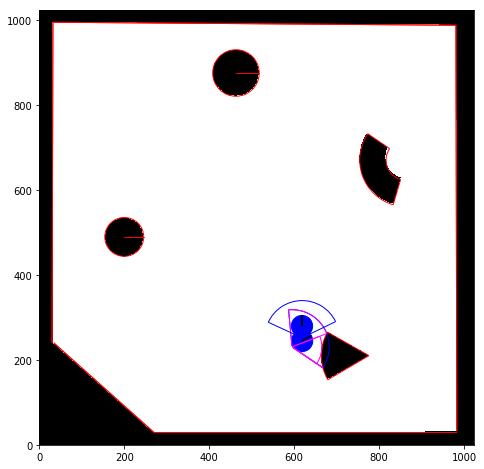

In [27]:

#robot = Robot(680,600,0,80,0,1.57,0)
#robot = Robot(800,800,0.5,100,0,1,0)
#robot = Robot(600,200,0,80,0,1,0)
#robot = Robot(600,900,3.14,80,0,1,0)
robot = Robot(618.776109497496, 244.5674431694285, 6.816263292370458,35,0,1.13,0)
#robot = Robot(800,770,4.5,80,0,1,0)
#robot = Robot(400,400,0,100,0,1,0)
robot.set_environment(obstacles)


fig,ax = plt.subplots(figsize=(8,8))
ax. set_aspect('equal')
ax.set_xlim([0, 1024])
ax.set_ylim([0, 1024])
ax.imshow(arena,cmap = plt.cm.gray_r,origin = 'lower')
for obstacle in obstacles:
#     obsa = obstacle
#     I = robot.interval
#     I.interval_analysis(obsa,5,5).draw(ax,"magenta")
    obstacle.draw(ax,'red')
#     del obsa
#     del I
robot.plot(ax)
robot.plot_interval(ax)
for i in range(1):

    
    pose,_ = robot.next_bot(1,1,ax)

    
    pose.plot(ax)
    pose.plot_interval(ax)
    robot = pose


Interval(1,2,0.5,1.7000000000000002,(0, 0))
[Interval(1,2,0.5,0.5847795860321076,(0, 0)), Interval(1,1.6055512754639891,0.5847795860321076,1.4306261201762616,(0, 0)), Interval(1,2,1.4306261201762616,1.7000000000000002,(0, 0))]


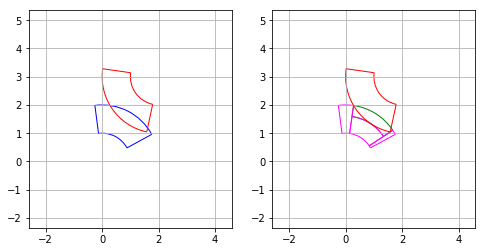

In [24]:
# I2 = Interval(0,2,0.6*np.pi,3*np.pi/2,origin=(3,1))
# I1 = Interval(1,3.5,2*np.pi-1,2*np.pi+1,origin=(-2,1))
# I2 = Interval(1,2,2+2*np.pi,4+2*np.pi,origin=(4.5,1))
# I1 = Interval(1,2,-1+2*np.pi,1+2*np.pi,origin=(1,1))
I2 = Interval(1,2,3,4.5,origin=(2,3))
I1 = Interval(1,2,0.5+2*np.pi,1.7+2*np.pi,origin=(0,0))
J = I1.fast_analysis(I2)
print(I1)
Is = I1.complement(J)
fig= plt.figure(figsize = (8,4))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
for I in Is:
    I.draw(ax1,'magenta')
print(Is)    
# for test_pt in test_pts:
#     ax.scatter(test_pt[0],test_pt[1])
I2.draw(ax1,'red')
#I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()


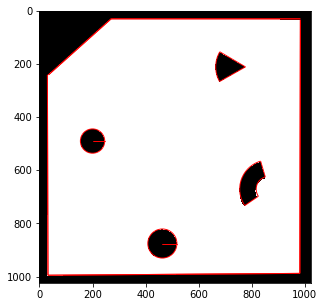

In [3]:
with open('obstacles.json') as f:   
    data = json.load(f)
obstacles = []
for obstacle in data['obstacles']:
    params,center = obstacle['params'],obstacle['center']
    obstacles.append(Interval(*params,center))
arena = cv2.imread("arena1.png")
arena = (1-cv2.cvtColor(arena,cv2.COLOR_RGB2GRAY)/255).astype('int')
fig,ax = plt.subplots(figsize=(5,5))
ax.imshow(arena,cmap = plt.cm.gray_r)
for obstacle in obstacles:
    obstacle.draw(ax,'red')
plt.show()
    

In [19]:
### no inheritance
class Robot:
    radius = 25
    bot_color = 'b'
    color = 'blue'
    Δt = 1
    obstacles = None
    Nr = 5
    Ntheta = 5

    
    def __init__(self,x_bot,y_bot,yaw,vi,vj,wi,wj):
        
        self.x_bot = x_bot
        self.y_bot = y_bot
        self.yaw = yaw
        self.vi = vi
        self.vj = vj
        self.wi = wi
        self.wj = wj
        
    @property
    def interval(self):
        theta1 = self.yaw%(2*np.pi) - (self.wi - self.wj)*self.Δt
        theta2 = self.yaw%(2*np.pi) + (self.wi - self.wj)*self.Δt
        origin = (self.x_bot+self.radius*(np.cos(theta1)+np.cos(theta2))/(1e-6 + np.sin(theta1-theta2)),
                       self.y_bot+self.radius*(np.sin(theta1)+np.sin(theta2))/(1e-6 + np.sin(theta1-theta2)))

        n = self.radius/np.sin(1e-6+(theta2-theta1)/2)
        nu1 = n - self.radius
        nu2 = n + self.radius + (self.vi-self.vj)*self.Δt
        return Interval(nu1,nu2,theta1,theta2,origin)
    
    def __repr__(self):
        return f"Robot at {self.x_bot},{self.y_bot},{self.yaw}"
    
    def set_path(self,path):
        self.path = path
    
    def collision_detection(self):
        Js = []        
        for obstacle in self.obstacles:
            I = self.interval
            J = I.fast_analysis(obstacle)
            if not(J.r2 == 1e-6 and J.theta1 -J.theta2 == 0) :
                Js.append(J)
            del J       
        return Js

    
    def generate_vw(self):
        min_angle = np.pi/24
        num_samples = np.ceil((abs(self.interval.theta2-self.interval.theta1)/min_angle)/2).astype('int')
        vws = []
        v = (self.interval.r2-self.interval.r1-2*self.radius)/self.Δt
        
        for i in range(num_samples):
            w = i*min_angle*self.Δt ### sus I.theta1+   
            vws.append([v,-1*w])
        for i in range(num_samples):
            w = i*min_angle*self.Δt ### sus I.theta1+
            vws.append([v,w])    
        return vws
            
    def collision_avoidance(self,Js,traj_v,traj_w,ax):
        """
        gives good v,w given bad v,w from the tracker
        """
        I = self.interval
        vws = self.generate_vw()

        min_angle = np.pi/24
        comps = set()
        
        if not len(Js) == 0:
            
            
            for J in Js:
                if not (J.r2 < 1e-4 and abs(J.theta2-J.theta1) < 1e-6):
                    #print("\n",J,"\n")
                    
                    comps.update(I.complement(J))

                    #J.draw(ax,"green")
#                     print(J)
                    
            for comp in comps:
                #print(comp)
                comp.draw(ax,'magenta')
                if not(comp.theta2-I.theta2 or comp.theta1-I.theta1):
                    
                    continue
#                 else:
#                     comp.draw(ax,'magenta')
#                     for i, [v,w] in enumerate(vws):

#                         thetax = self.yaw%(2*np.pi)+w*self.Δt
#                         if thetax<max(comp.theta2,comp.theta1)+np.arcsin(self.radius/(I.r2-self.radius))+np.pi/12 and \
#                            thetax>min(comp.theta2,comp.theta1)-np.arcsin(self.radius/(I.r2-self.radius))-np.pi/12:
#                             vnew = ((comp.r2-comp.r1-2*self.radius)/self.Δt)
#                             vnew = vnew if vnew>0 else 0
#                             vws[i] = [vnew,w]

                        
#                 if comp.r2 == I.r2:
#                     continue
                    
                else:   
                    
                    for i,[v,w] in enumerate(vws):
                        if self.yaw%(2*np.pi)+w*self.Δt<= max(comp.theta1,comp.theta2)+np.arcsin(self.radius/(I.r2-self.radius))+2*np.pi/24 and \
                        self.yaw%(2*np.pi)+w*self.Δt>=min(comp.theta1,comp.theta2)-np.arcsin(self.radius/(I.r2-self.radius))-2*np.pi/24:
                            #np.pi/24 is min angle
                            vnew = ((comp.r2-comp.r1-2*self.radius)/self.Δt)
                            if v>vnew and vnew>=0:
                                vws[i][0] = vnew

            vwes = np.array(vws)[::-1]
            #print('vwes = ', vwes)
            #idr = np.random.choice(range(len(vwes)))
#             ws = vwes[:,1]
#             traj_ws = traj_w*np.ones_like(ws)
#             diff = (ws-traj_ws-np.pi/3)**2
# #     # #         print(vws)
# #             print(diff)
#             vwn = vwes[np.argmin(diff)]
            
            is_collide = True
            
            v_max,ws = vwes[np.argmax(vwes[:,0])]
            
            for v,w in vwes:
                if v >= abs(self.vi-self.vj)-1 and abs(w)<np.pi/15:
                    v_max = v*0.75
                    ws = w
                    #print("best")
                    break
                
            if max(vwes[:,0])<abs(self.vi-self.vj)*0.75:
                v_max = 0
                ws = abs(self.wi-self.wj)*np.sign(traj_w)*0.5
                
                    
                
    
        
            #w_x = np.array([abs(w-traj_w) for v,w in vwes])
            
            vwn = np.array([v_max,ws])
    #         print("vwn = ",vwn)
            #return vwes[idr] 
    #         print(vwes)
        else:
            max_w = abs(self.wi-self.wj)
            traj_w = traj_w if abs(traj_w)<max_w else max_w*np.sign(traj_w)
            traj_v = traj_v if traj_v<=abs(self.vi-self.vj) else abs(self.vi-self.vj)
            vwn = np.array([traj_v,traj_w])
            is_collide = False
#             print("no collision ")
#             print("applied velocity = ", vwn)
        
        return vwn,is_collide

    
    def next_bot(self,traj_v,traj_w,ax):
        Js = self.collision_detection()
        vw,is_collide = self.collision_avoidance(Js,traj_v,traj_w,ax)
        v,w = vw
#         for J in Js:
#             J.draw(ax,'magenta')
        yaw = self.yaw + w*self.Δt
        x_bot = self.x_bot + v*np.cos(yaw)*self.Δt
        y_bot = self.y_bot + v*np.sin(yaw)*self.Δt
        self.yaw = yaw
        self.x_bot = x_bot
        self.y_bot = y_bot
        
        
#         vi = self.vi
#         vj = self.vj
#         wi = self.wi
#         wj = self.wj
        return self,is_collide
    def next_bots(self,ax):
        bots = []
        Js = self.collision_detection()
        vws,_ = self.collision_avoidance(Js,1,1,ax)
        for v,w in vws:
            
            yaw = self.yaw + w*self.Δt
            x_bot = self.x_bot + v*np.cos(yaw)*self.Δt
            y_bot = self.y_bot + v*np.sin(yaw)*self.Δt
            bots.append(Robot(x_bot,y_bot,yaw,self.vi,self.vj,self.wi,self.wj))

        return bots
    def next_pose(self,v,w):
        yaw = self.yaw + w*self.Δt
        x_bot = self.x_bot + v*np.cos(yaw)*self.Δt
        y_bot = self.y_bot + v*np.sin(yaw)*self.Δt
        self.yaw = yaw
        self.x_bot = x_bot
        self.y_bot = y_bot
        return self
            
        
        
    def plot(self,ax):
        bot_circle = plt.Circle( (self.x_bot, self.y_bot),self.radius,color=self.bot_color)
        arrow = ax.arrow(self.x_bot,self.y_bot,self.radius*np.cos(self.yaw),self.radius*np.sin(self.yaw))
        patch = ax.add_patch(bot_circle)
        return [bot_circle,arrow]
                           
    def plot_interval(self,ax):
#         for I in self.Is:
#             I.draw(ax,'green')
        self.interval.draw(ax,self.color)
        
    
    @classmethod
    def set_environment(cls,obstacles):
        cls.obstacles = obstacles
       

Interval(5.651830281584495,145.6518302815845,-1.225790099134958,0.2975121231774054,(234.06195321332612, 129.0002467682798))
Interval(5.651830281584495,106.2619058385182,5.057395223502973,5.526424436077919,(234.06195321332612, 129.0002467682798))
Interval(5.651830281584495,61.21277660729748,4.580697430356988,5.057395208044628,(234.06195321332612, 129.0002467682798))
Interval(5.651830281584495,145.6518302815845,-0.7567608711016671,0.2975121231774054,(234.06195321332612, 129.0002467682798))


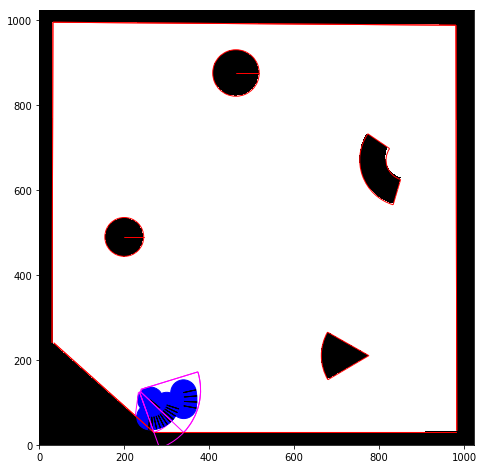

In [135]:

robot = Robot(261.27279972484274, 105.96489865912267, 5.580697430356992,80,0,1,0)
#robot = Robot(800,800,0.5,100,0,1,0)
#robot = Robot(320,900,6.3,80,0,1,0)
#robot = Robot(600,900,3.14,80,0,1,0)
#robot = Robot(900,800,4.2,100,0,1,0)
#robot = Robot(800,770,4.5,80,0,1,0)
#robot = Robot(400,400,0,100,0,1,0)
robot.set_environment(obstacles)


fig,ax = plt.subplots(figsize=(8,8))
ax. set_aspect('equal')
ax.set_xlim([0, 1024])
ax.set_ylim([0, 1024])
ax.imshow(arena,cmap = plt.cm.gray_r,origin = 'lower')
for obstacle in obstacles:
#     obsa = obstacle
#     I = robot.interval
#     I.interval_analysis(obsa,5,5).draw(ax,"magenta")
    obstacle.draw(ax,'red')
#     del obsa
#     del I
robot.plot(ax)
#robot.plot_interval(ax)

for i in range(1):

    
    #pose,_ = robot.next_bot(1,1,ax)
    for ps in robot.next_bots(ax):
#         pass
        ps.plot(ax)

    
    #pose.plot(ax)
    #pose.plot_interval(ax)
    #robot = pose
        

best
best


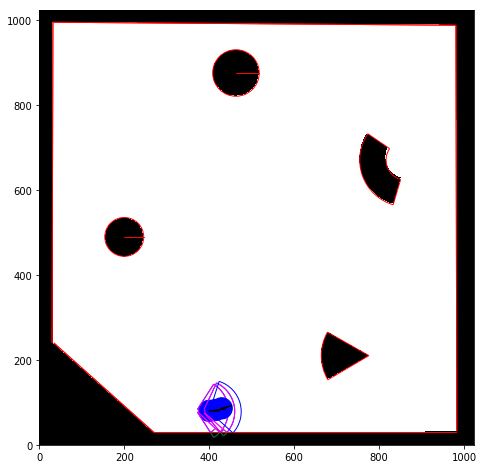

In [75]:

#robot = Robot(680,600,0,80,0,1.57,0)
#robot = Robot(800,800,0.5,100,0,1,0)
#robot = Robot(300,500,-1.57,40,0,1,0)
#robot = Robot(600,900,3.14,80,0,1,0)
#robot = Robot(900,800,4.2,100,0,1,0)
#robot = Robot(800,770,4.5,80,0,1,0)
#robot = Robot(400,400,0,100,0,1,0)
robot = Robot(400,80,0,20,0,1,0)
robot.set_environment(obstacles)


fig,ax = plt.subplots(figsize=(8,8))
ax. set_aspect('equal')
ax.set_xlim([0, 1024])
ax.set_ylim([0, 1024])
ax.imshow(arena,cmap = plt.cm.gray_r,origin = 'lower')
for obstacle in obstacles:
#     obsa = obstacle
#     I = robot.interval
#     I.interval_analysis(obsa,5,5).draw(ax,"magenta")
    obstacle.draw(ax,'red')
#     del obsa
#     del I
robot.plot(ax)
robot.plot_interval(ax)

# print(robot.interval.gamma2.encloses(Point(obstacles[1].origin)))
# print("\n",obstacles[1].gamma2.encloses(Point(robot.interval.gamma2.origin)))
#robot.interval.fast_analysis(obstacles[1]).draw

# inters = intersection(robot.interval.gamma2.circle,obstacles[1].gamma2.circle)
# for inter in inters:
#     print(robot.interval.gamma2.encloses(inter))
#     print(obstacles[1].gamma2.encloses(inter))

for i in range(2):

    
    pose,is_collide = robot.next_bot(1,1,ax)

    
    pose.plot(ax)
    pose.plot_interval(ax)
    robot = pose
    
    


        

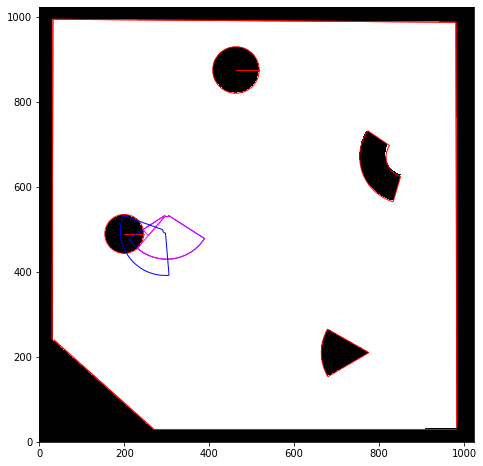

In [6]:

#robot = Robot(680,600,0,80,0,1.57,0)
#robot = Robot(800,800,0.5,100,0,1,0)
robot = Robot(300,500,-1.57,40,0,1,0)
#robot = Robot(600,900,3.14,80,0,1,0)
#robot = Robot(900,800,4.2,100,0,1,0)
#robot = Robot(800,770,4.5,80,0,1,0)
#robot = Robot(400,400,0,100,0,1,0)
robot.set_environment(obstacles)


fig,ax = plt.subplots(figsize=(8,8))
ax. set_aspect('equal')
ax.set_xlim([0, 1024])
ax.set_ylim([0, 1024])
ax.imshow(arena,cmap = plt.cm.gray_r,origin = 'lower')
for obstacle in obstacles:
#     obsa = obstacle
#     I = robot.interval
#     I.interval_analysis(obsa,5,5).draw(ax,"magenta")
    obstacle.draw(ax,'red')
#     del obsa
#     del I
#robot.plot(ax)
robot.plot_interval(ax)

# print(robot.interval.gamma2.encloses(Point(obstacles[1].origin)))
# print("\n",obstacles[1].gamma2.encloses(Point(robot.interval.gamma2.origin)))
#robot.interval.fast_analysis(obstacles[1]).draw

# inters = intersection(robot.interval.gamma2.circle,obstacles[1].gamma2.circle)
# for inter in inters:
#     print(robot.interval.gamma2.encloses(inter))
#     print(obstacles[1].gamma2.encloses(inter))

for i in range(1):

    
    pose,is_collide = robot.next_bot(1,1,ax)

    
    #pose.plot(ax)
    pose.plot_interval(ax)
    robot = pose
    
    
#     for I in pose.Is:
#         I.draw(ax,'green')
    

# robot.collision_detection()


# pose1 = pose.next_bot()
# pose1.plot(ax)
# pose1.plot_interval(ax)
# pose1 = pose1.next_bot()
# pose1.plot(ax)
# pose1.plot_interval(ax)

# i = 0
# traj = []
# for pose in robot:
#     i+=1
#     for obstacle in obstacles:
#         obstacle.draw(ax,'red')
#     traj.append((pose.x_bot,pose.y_bot))    
#     pose.plot(ax)
#     pose.plot_interval(ax)
#     del pose
#     if i == 4:
#         break

# path = np.array(traj).T    
# ax.plot(path[0],path[1],'y-')

        

run: 0


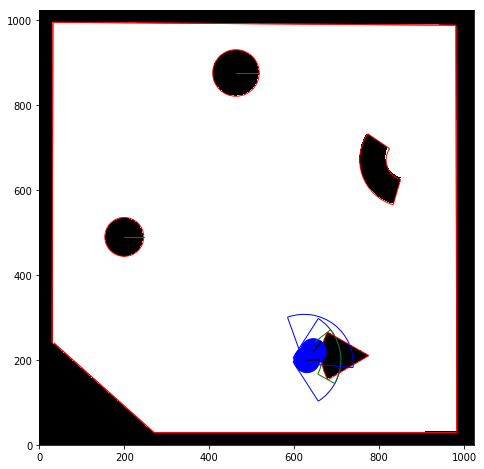

In [21]:

#robot = Robot(680,600,0,80,0,1,0)
#robot = Robot(800,800,0.5,100,0,1,0)
#robot = Robot(379.4084003997459, 907.8212642902986, 0.1308996938995747,80,0,1,0)
#robot = Robot(600,900,3.14,80,0,1,0)
#robot = Robot(900,700,5,100,0,1,0)
robot = Robot(630,200,0,50,0,1,0)
#robot = Robot(800,770,4.5,80,0,1,0)
#robot = Robot(400,400,0,100,0,1,0)
robot.set_environment(obstacles)


fig,ax = plt.subplots(figsize=(8,8))
ax. set_aspect('equal')
ax.set_xlim([0, 1024])
ax.set_ylim([0, 1024])
ax.imshow(arena,cmap = plt.cm.gray_r,origin = 'lower')
for obstacle in obstacles:
#     obsa = obstacle
#     I = robot.interval
#     I.interval_analysis(obsa,5,5).draw(ax,"magenta")
    obstacle.draw(ax,'red')
#     del obsa
#     del I
robot.plot(ax)
robot.plot_interval(ax)

# print(robot.interval.gamma2.encloses(Point(obstacles[1].origin)))
# print("\n",obstacles[1].gamma2.encloses(Point(robot.interval.gamma2.origin)))
#robot.interval.fast_analysis(obstacles[1]).draw

# inters = intersection(robot.interval.gamma2.circle,obstacles[1].gamma2.circle)
# for inter in inters:
#     print(robot.interval.gamma2.encloses(inter))
#     print(obstacles[1].gamma2.encloses(inter))
log = []
for i in range(1):

    
    pose,is_c = robot.next_bot(0,0,ax)
    
    print("run:",i)
    log.append(f'run {i} :'+repr(pose))
    pose.plot(ax)
    pose.plot_interval(ax)
    robot = pose
    
    
#     for I in pose.Is:
#         I.draw(ax,'green')
    

# robot.collision_detection()


# pose1 = pose.next_bot()
# pose1.plot(ax)
# pose1.plot_interval(ax)
# pose1 = pose1.next_bot()
# pose1.plot(ax)
# pose1.plot_interval(ax)

# i = 0
# traj = []
# for pose in robot:
#     i+=1
#     for obstacle in obstacles:
#         obstacle.draw(ax,'red')
#     traj.append((pose.x_bot,pose.y_bot))    
#     pose.plot(ax)
#     pose.plot_interval(ax)
#     del pose
#     if i == 4:
#         break

# path = np.array(traj).T    
# ax.plot(path[0],path[1],'y-')

        

In [25]:
log


['run 0 :Robot at 875.528280271123,666.3436419610946,4.083702142702977',
 'run 1 :Robot at 903.8944988174457,570.4512144947807,5.0',
 'run 2 :Robot at 845.0861809162436,489.57116908411615,4.083702142702977',
 'run 3 :Robot at 873.4523994625663,393.6787416178023,5.0',
 'run 4 :Robot at 901.818618008889,297.78631415148845,5.0',
 'run 5 :Robot at 843.0103001076869,216.9062687408239,4.083702142702977',
 'run 6 :Robot at 871.3765186540096,121.01384127451004,5.0',
 'run 7 :Robot at 928.2657448644608,99.15206983924787,5.916297857297023',
 'run 8 :Robot at 1013.5489995023959,151.3705194366949,6.832595714594046',
 'run 9 :Robot at 1024.0384740533357,250.81885237217043,7.7488935718910685']

run: 0
run: 1
no collision 
applied velocity =  [80  1]
run: 2
no collision 
applied velocity =  [80  1]
run: 3
no collision 
applied velocity =  [80  1]
run: 4
run: 5
run: 6


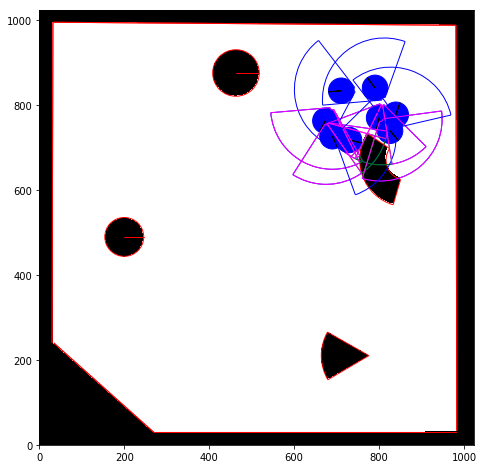

In [75]:

#robot = Robot(680,600,0,80,0,1,0)
#robot = Robot(800,800,0.5,100,0,1,0)
#robot = Robot(379.4084003997459, 907.8212642902986, 0.1308996938995747,80,0,1,0)
#robot = Robot(600,900,3.14,80,0,1,0)
#robot = Robot(928.2657448644608,200.15206983924787,5.9,80,0,1,0)
robot = Robot(800,770,4.5,80,0,1,0)
#robot = Robot(400,400,0,100,0,1,0)
robot.set_environment(obstacles)


fig,ax = plt.subplots(figsize=(8,8))
ax. set_aspect('equal')
ax.set_xlim([0, 1024])
ax.set_ylim([0, 1024])
ax.imshow(arena,cmap = plt.cm.gray_r,origin = 'lower')
for obstacle in obstacles:
#     obsa = obstacle
#     I = robot.interval
#     I.interval_analysis(obsa,5,5).draw(ax,"magenta")
    obstacle.draw(ax,'red')
#     del obsa
#     del I
robot.plot(ax)
robot.plot_interval(ax)

# print(robot.interval.gamma2.encloses(Point(obstacles[1].origin)))
# print("\n",obstacles[1].gamma2.encloses(Point(robot.interval.gamma2.origin)))
#robot.interval.fast_analysis(obstacles[1]).draw

# inters = intersection(robot.interval.gamma2.circle,obstacles[1].gamma2.circle)
# for inter in inters:
#     print(robot.interval.gamma2.encloses(inter))
#     print(obstacles[1].gamma2.encloses(inter))
log = []
for i in range(7):

    
    pose,_ = robot.next_bot(80,1,ax)
    
    print("run:",i)
    log.append(f'run {i} :'+repr(pose.interval))
    pose.plot(ax)
    pose.plot_interval(ax)
    
    #robot = pose
    
    
#     for I in pose.Is:
#         I.draw(ax,'green')
    

# robot.collision_detection()


# pose1 = pose.next_bot()
# pose1.plot(ax)
# pose1.plot_interval(ax)
# pose1 = pose1.next_bot()
# pose1.plot(ax)
# pose1.plot_interval(ax)

# i = 0
# traj = []
# for pose in robot:
#     i+=1
#     for obstacle in obstacles:
#         obstacle.draw(ax,'red')
#     traj.append((pose.x_bot,pose.y_bot))    
#     pose.plot(ax)
#     pose.plot_interval(ax)
#     del pose
#     if i == 4:
#         break

# path = np.array(traj).T    
# ax.plot(path[0],path[1],'y-')

        ######################################################   patch up

In [34]:
class PurePursuitTracker:
  
    def __init__(self, x, y, v, lookahead = 3.0):
        """
        Tracks the path defined by x, y at velocity v
        x and y must be numpy arrays
        v and lookahead are floats
        """
        self.length = len(x)
        self.ref_idx = 0 
        self.lookahead = lookahead
        self.x, self.y = x, y
        self.v, self.w = v, 0
        self.goal_threshold = 80

    def update(self, xc, yc, theta):
        """
        Input: xc, yc, theta - current pose of the robot
        Update v, w based on current pose
        Returns True if trajectory is over.
        """
        if self.ref_idx >= self.length:
            ref_x,ref_y = self.x[-1],self.y[-1]
        else:  
            ref_x,ref_y = self.x[self.ref_idx],self.y[self.ref_idx]
        
        if self.ref_idx > self.length and np.sqrt((ref_x-self.x[-1])**2+ (ref_y-self.y[-1])**2) < self.goal_threshold: 
            return True   
        if np.sqrt((xc-self.x[-1])**2+ (yc-self.y[-1])**2) < self.goal_threshold:
            return True
        
        if np.sqrt((ref_x-xc)**2+ (ref_y-yc)**2) < self.lookahead:
            self.ref_idx += 1 
        
        anchor = np.asarray([ref_x - xc, ref_y - yc])

        theta = np.pi/2 - theta
        rot = np.asarray([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        anchor = np.dot(rot, anchor)
        
        L = np.sqrt(anchor[0] ** 2 + anchor[1] **2) # dist to reference path
        
        X = anchor[0] 
        
        self.w = -2*self.v*X/L/L

        return False
    def revamp(self, xc, yc):
        tracker_xy = np.column_stack((self.x,self.y))
        curr_xy = np.array([xc,yc])
        mina = 0
        mind = np.inf
        veclis = tracker_xy-curr_xy
        for i in range(len(veclis)):
            d = np.linalg.norm(veclis[i])
            if d<mind:
                mind = d    
                mina = i
                
        self.x = self.x[mina:]
        self.y = self.y[mina:]
        self.ref_idx = 0
        self.length = len(self.x)
            
            

def get_line(start, end):
    # Setup initial conditions
    x1, y1 = start
    x2, y2 = end
    dx = x2 - x1
    dy = y2 - y1
    
    # Determine how steep the line is
    is_steep = abs(dy) > abs(dx)
    # Rotate line
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    # Swap start and end points if necessary and store swap state
    swapped = False
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        swapped = True
    # Recalculate differentials
    dx = x2 - x1
    dy = y2 - y1
    # Calculate error
    error = int(dx / 2.0)
    ystep = 1 if y1 < y2 else -1
    # Iterate over bounding box generating points between start and end
    y = y1
    points = []
    for x in range(x1, x2 + 1):
        coord = (y, x) if is_steep else (x, y)
        points.append(coord)
        error -= abs(dy)
        if error < 0:
            y += ystep
            error += dx
    # Reverse the list if the coordinates were swapped
    if swapped:
        points.reverse()
    pts = []    
    for i in range(len(points)):
        if not i%60:
            pts.append(points[i])
            
    slop = Segment(start,end).slope
    if slop is Segment((0,0),(0,1)).slope:
        s = np.arctan(float(slop)*(end[1]-start[1]))
    else:
        s = np.arctan(float(slop))
    thetas = s*np.ones((len(pts),1)) 
    poses = np.append(np.array(pts),thetas,axis=1)
    
    return poses

In [6]:
A = (250,800)
B = (200,100)
C = (660,250)
D = (800,600)
E = (400,1000)
AB = get_line(A,B)
BC = get_line(B,C)

CD = get_line(C,D)
DE = get_line(D,E)

ARRIVED!!


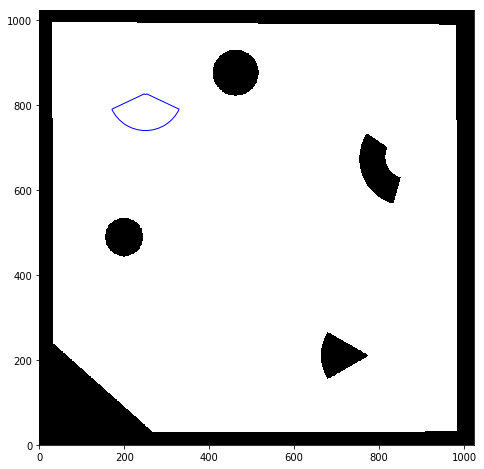

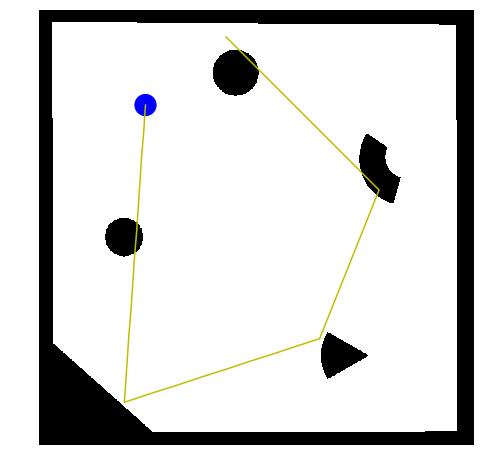

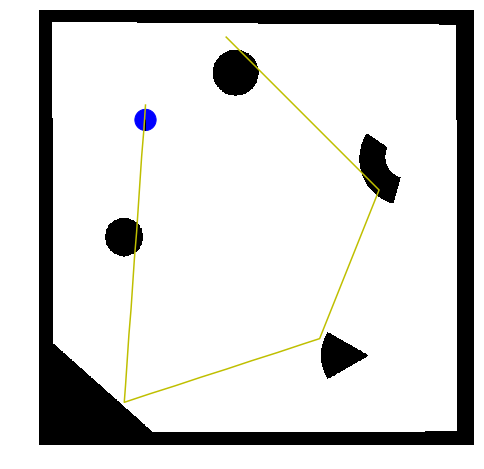

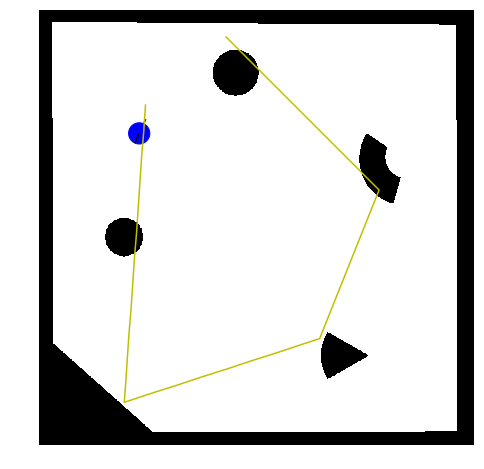

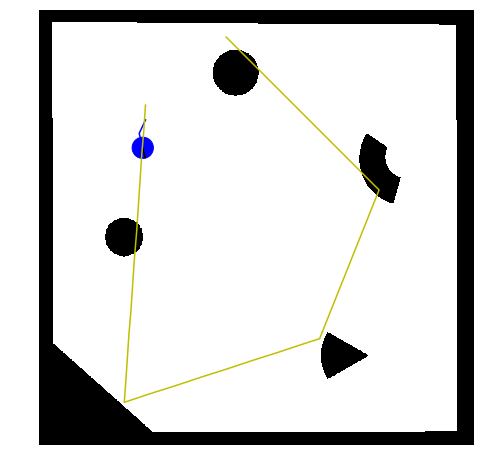

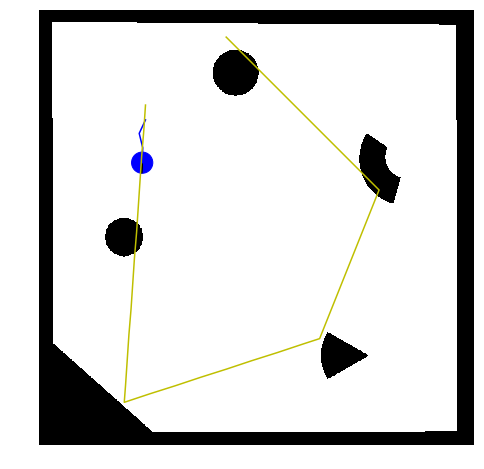

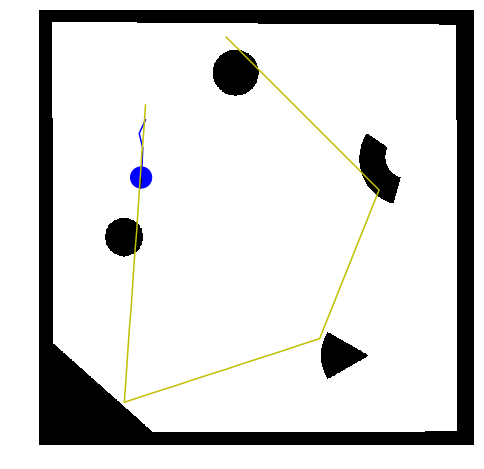

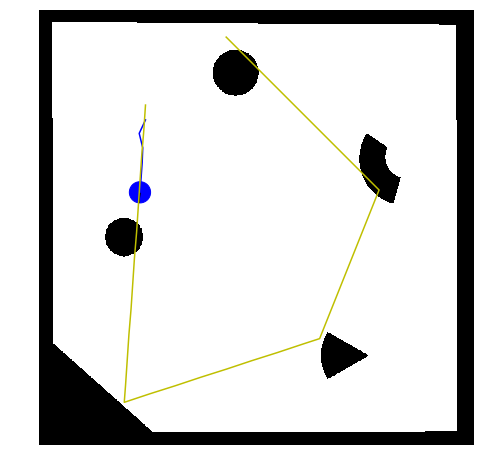

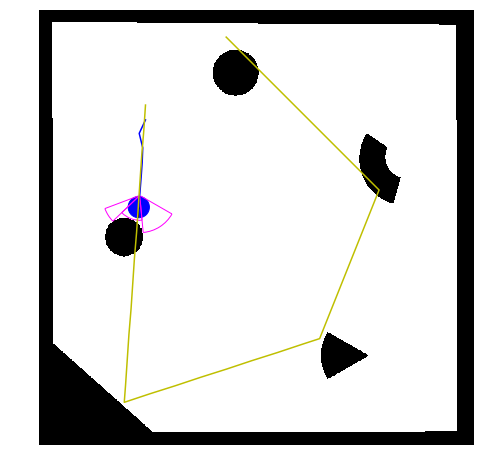

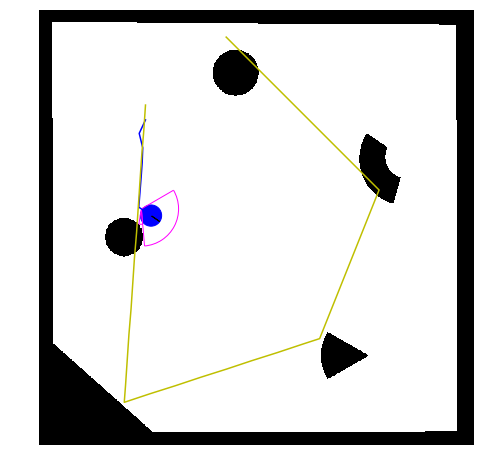

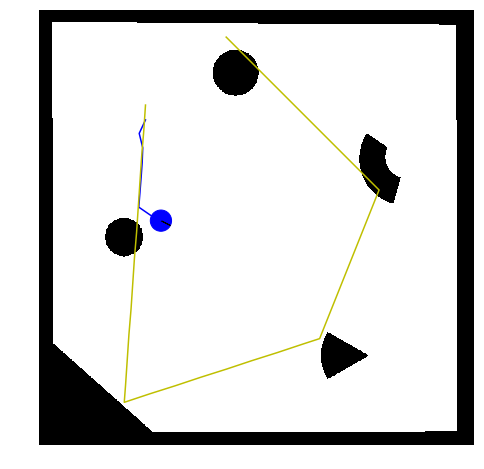

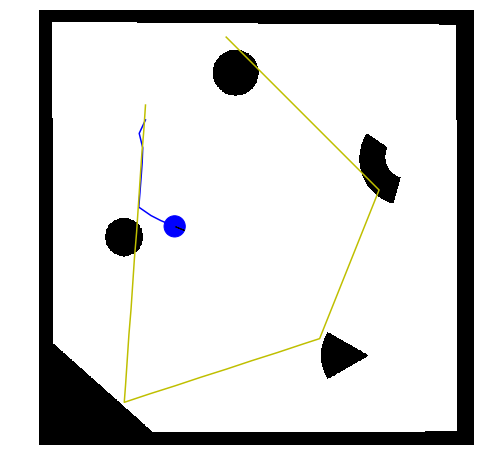

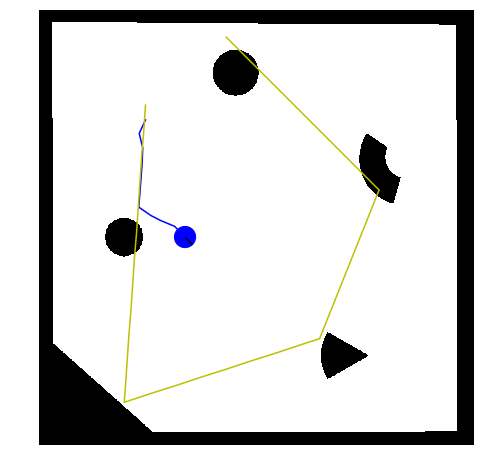

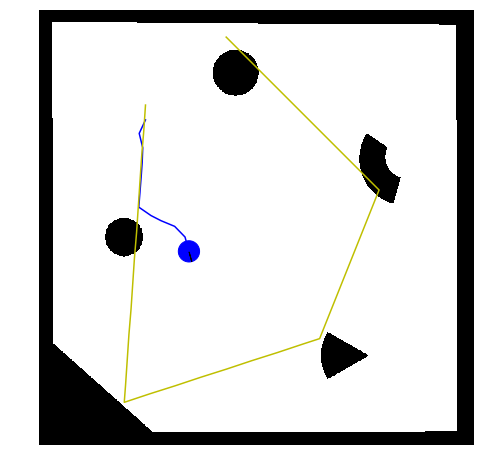

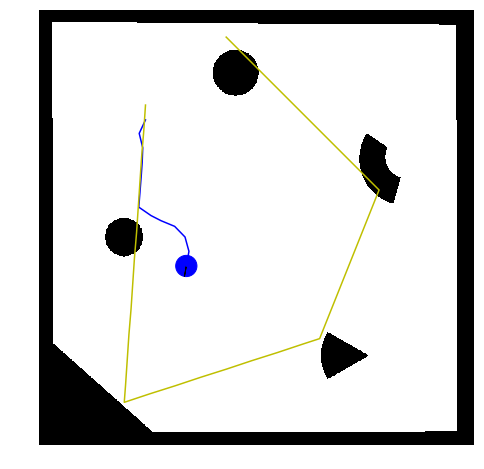

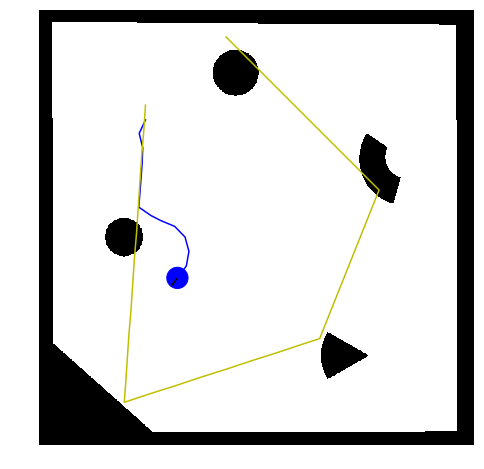

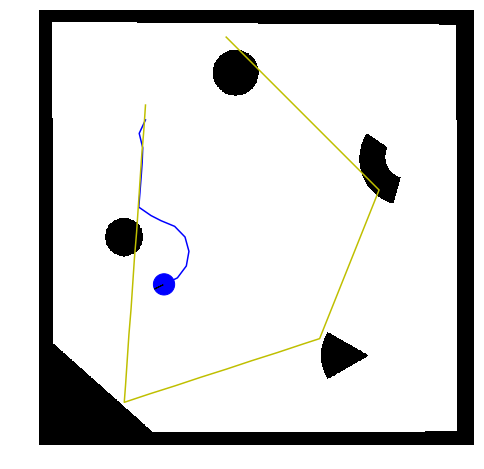

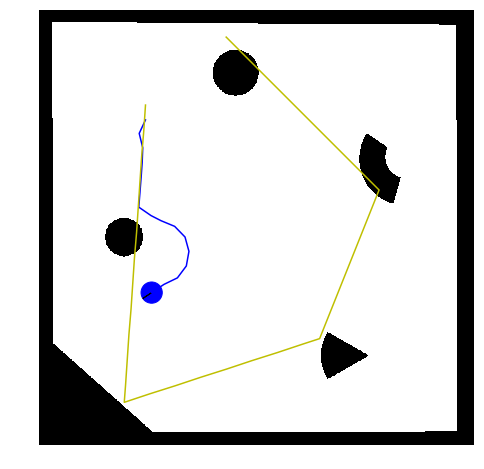

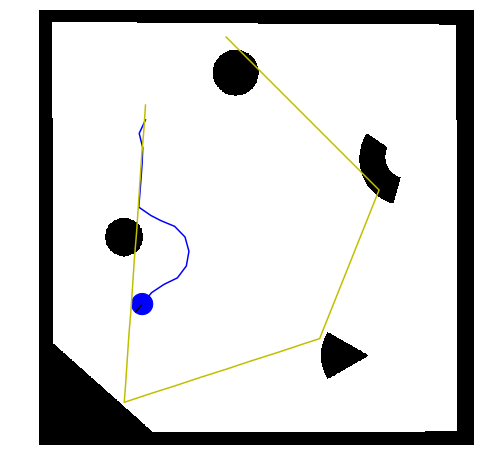

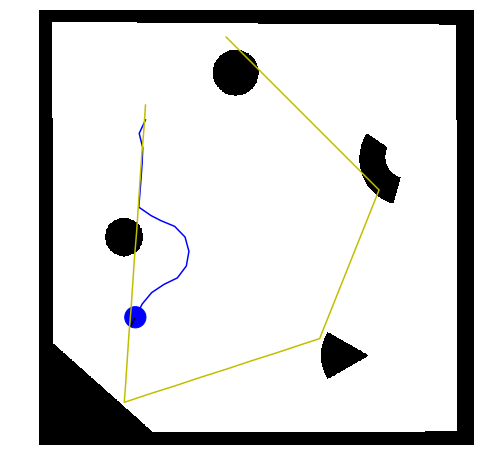

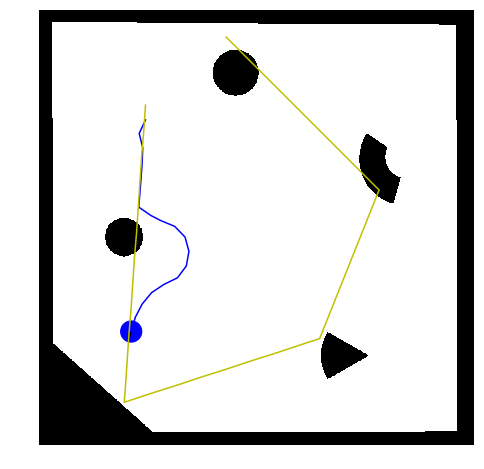

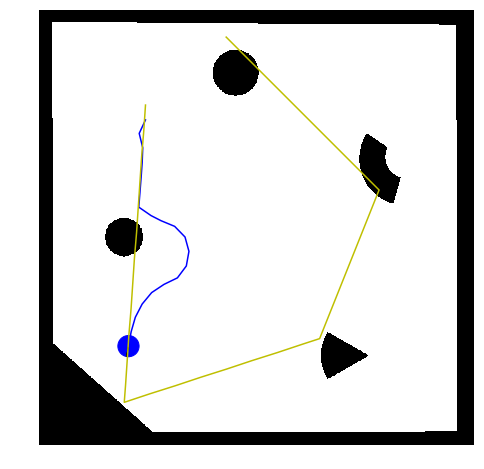

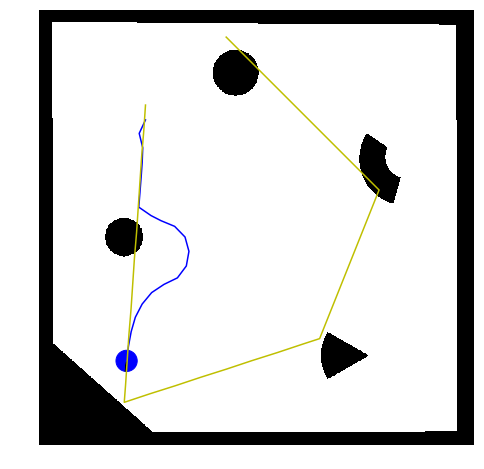

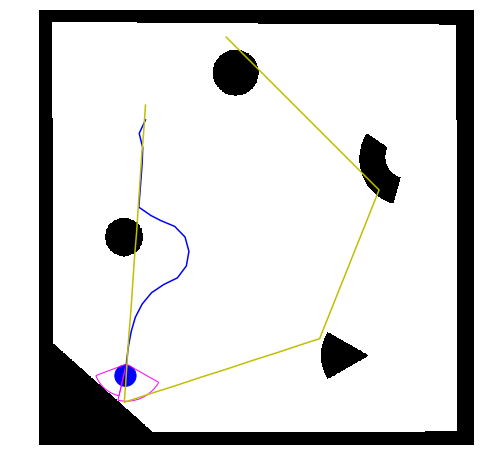

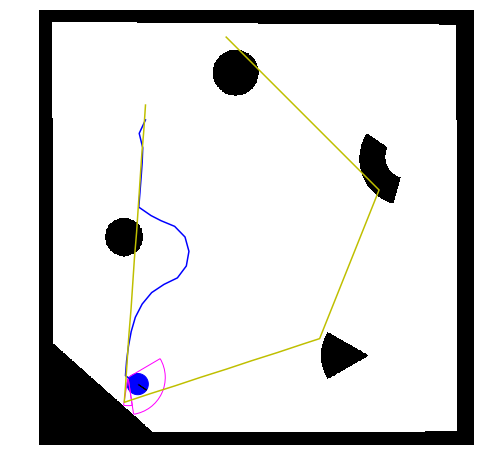

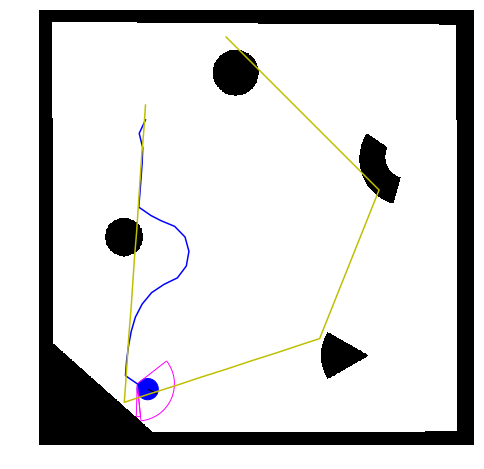

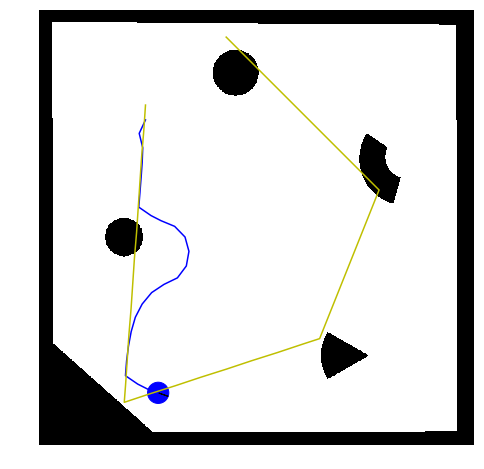

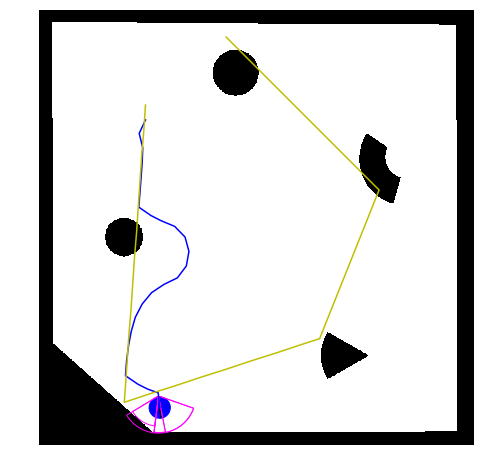

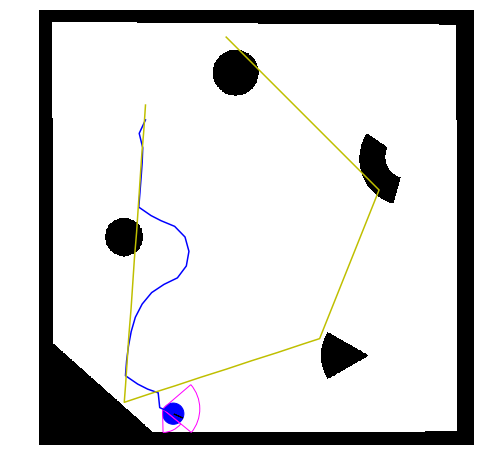

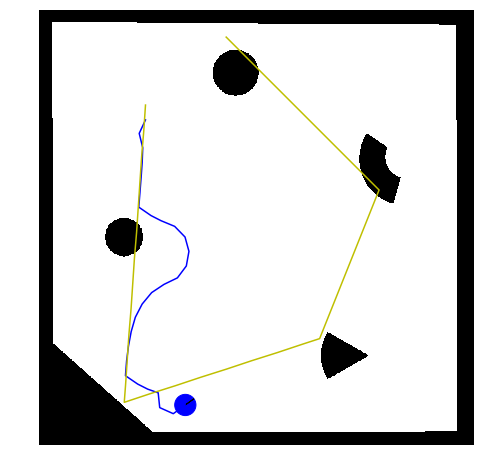

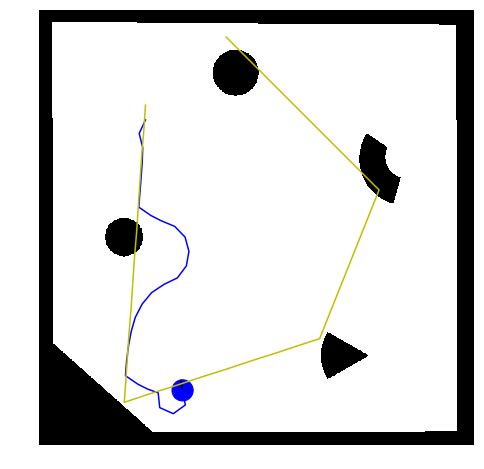

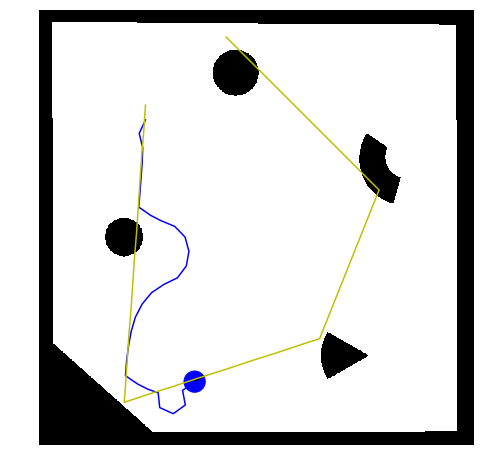

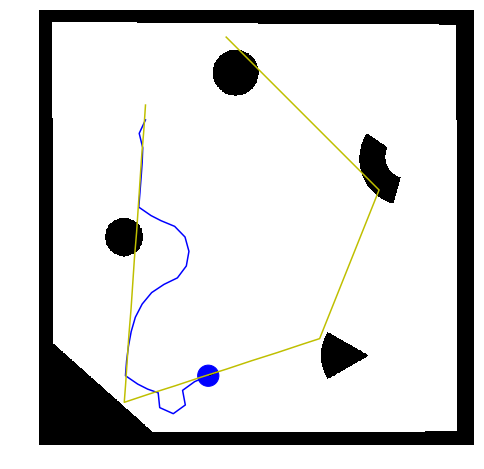

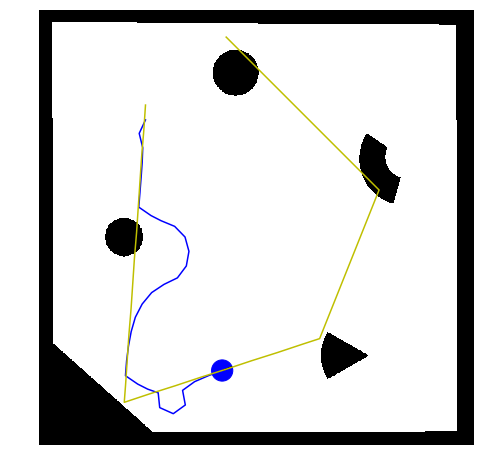

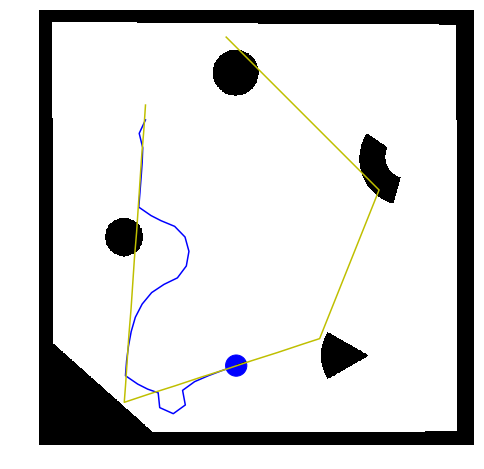

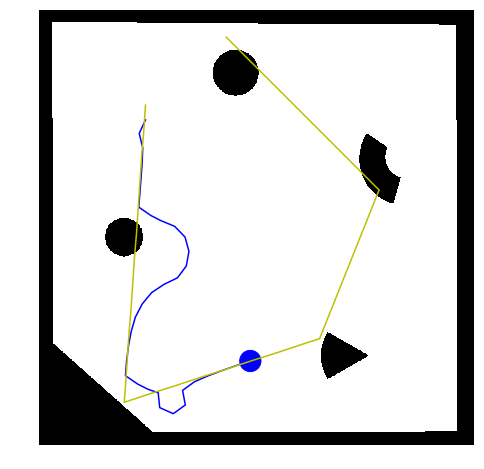

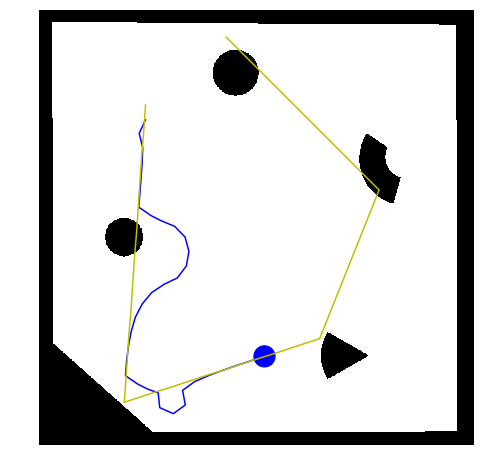

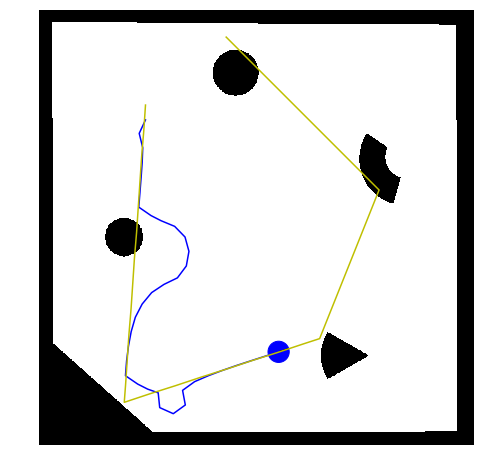

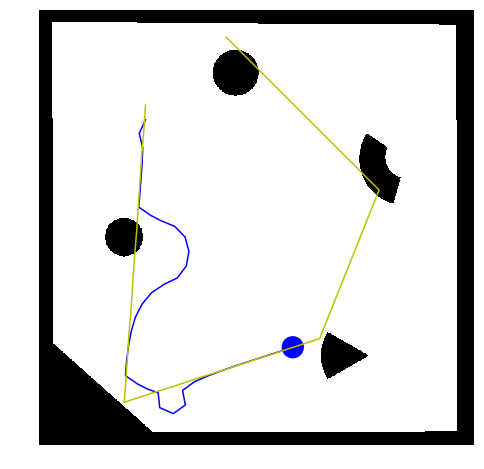

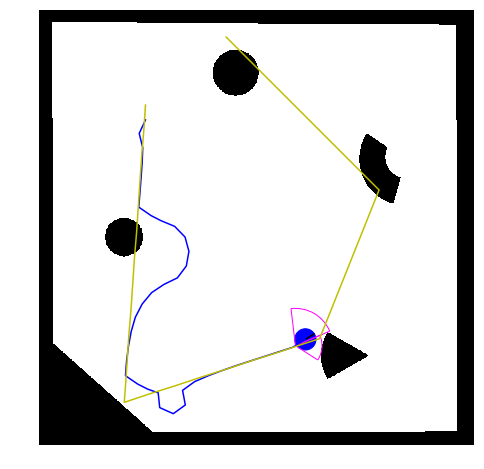

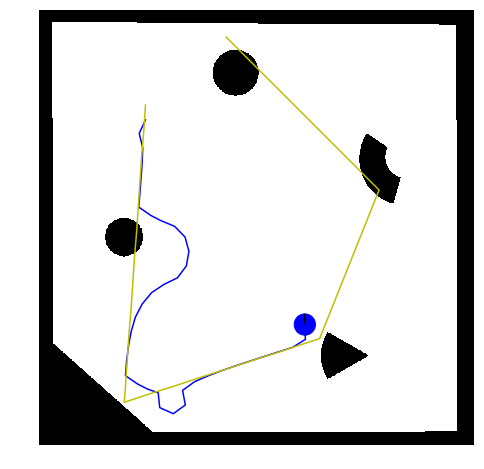

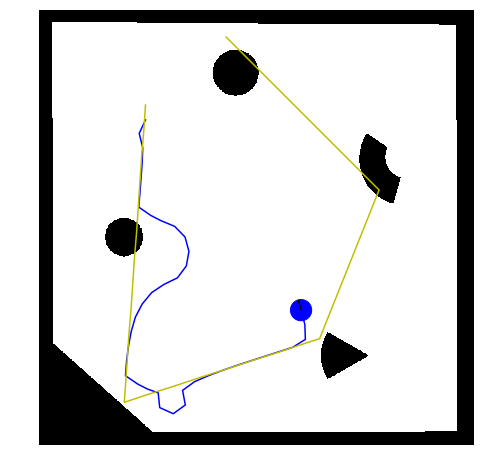

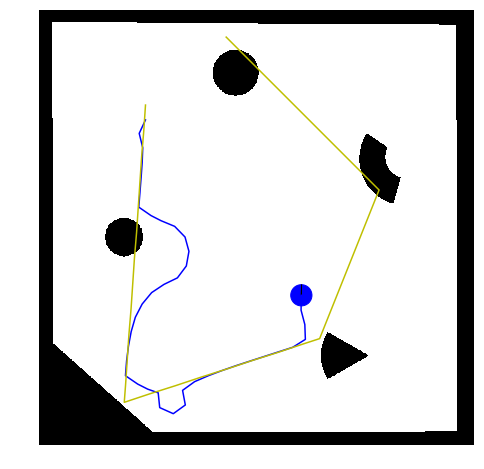

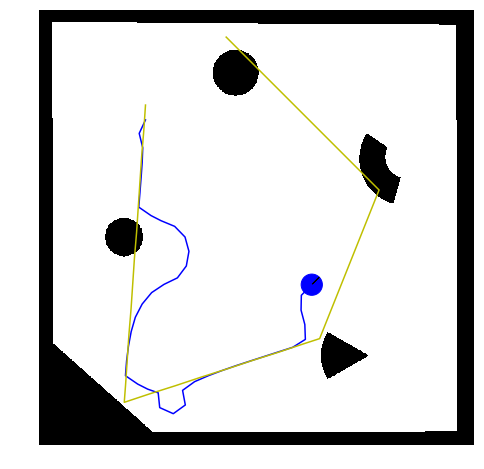

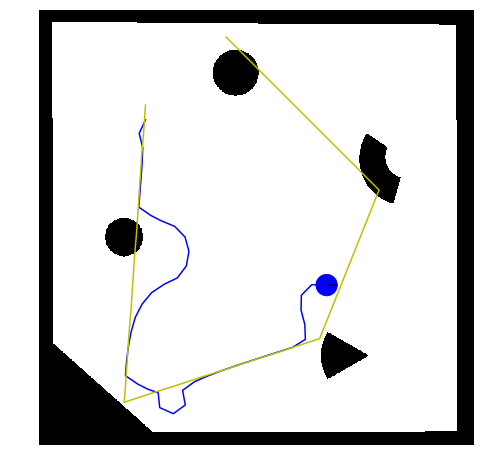

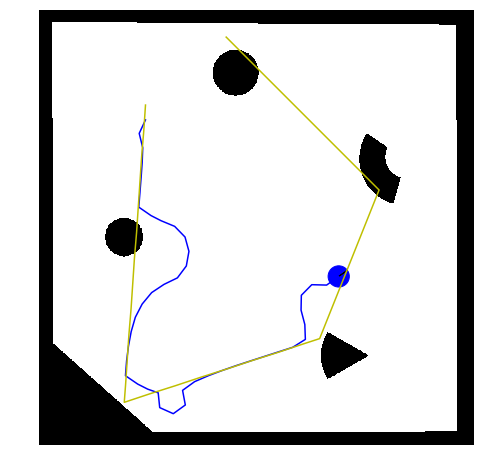

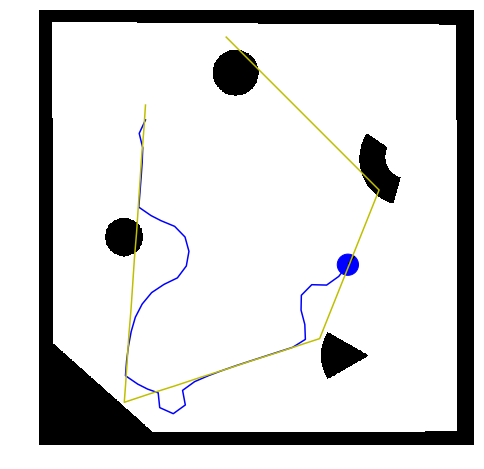

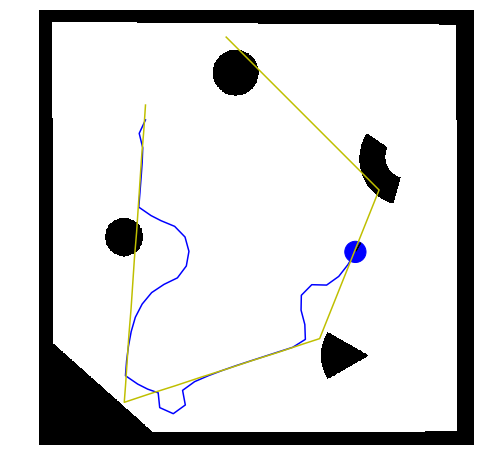

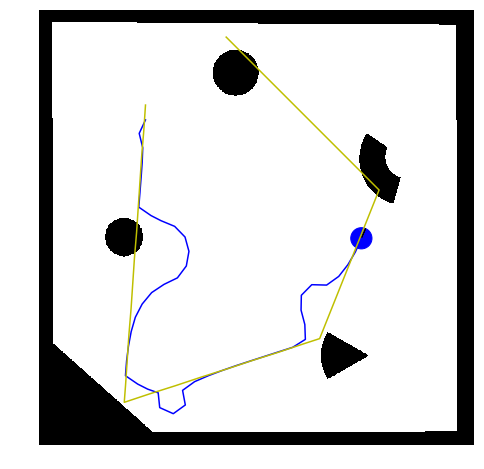

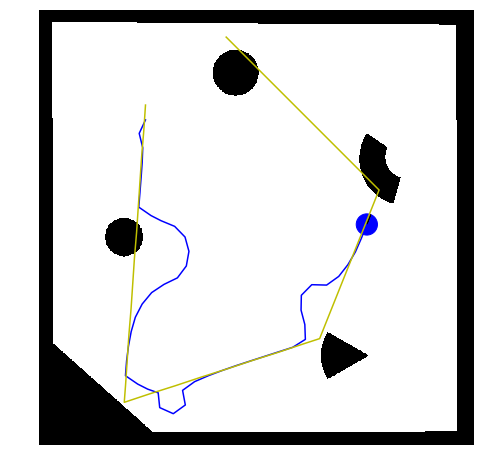

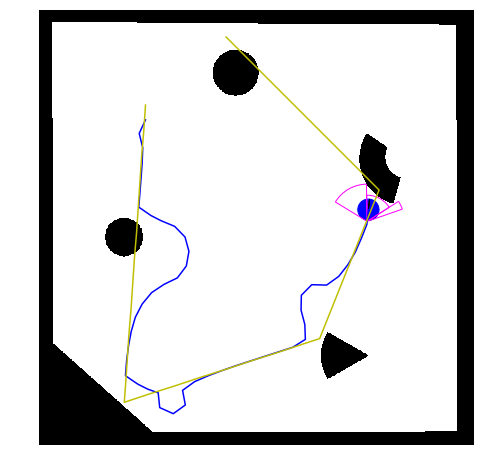

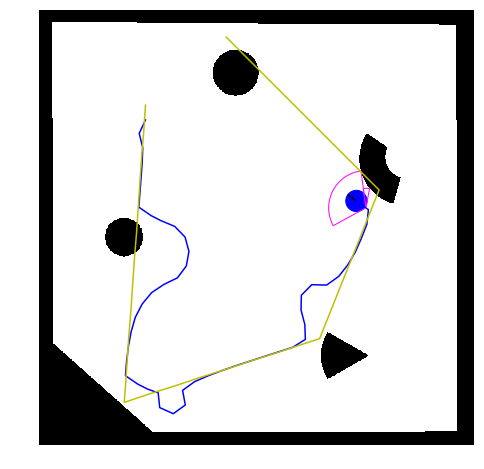

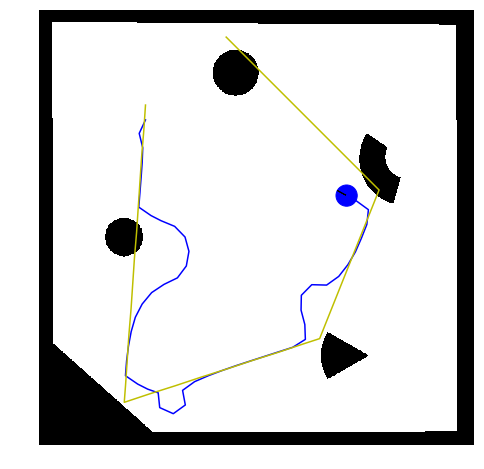

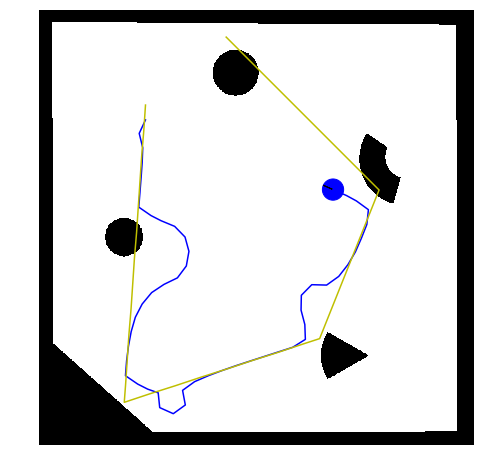

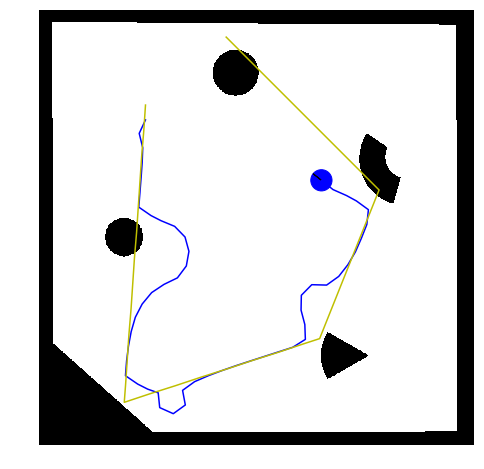

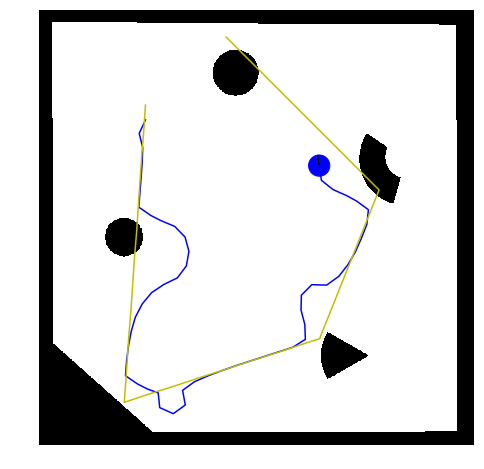

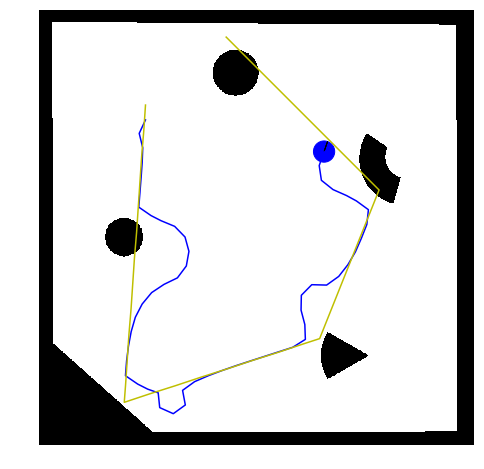

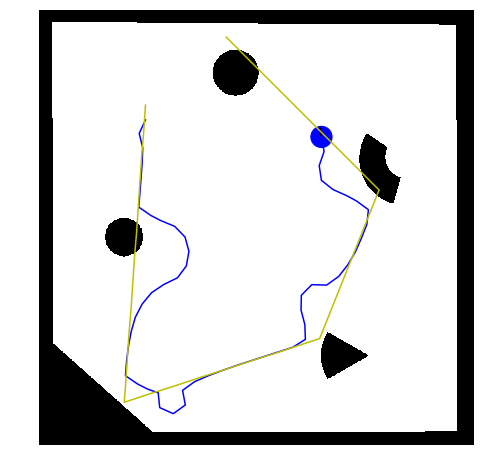

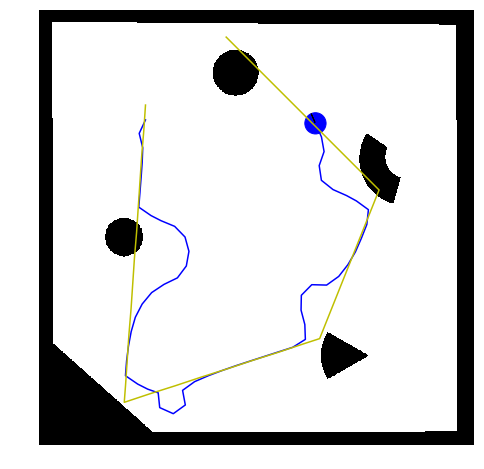

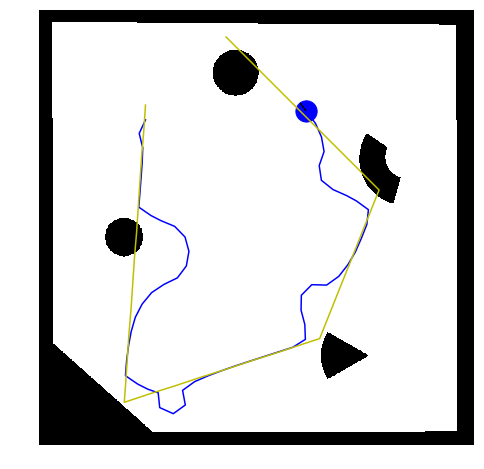

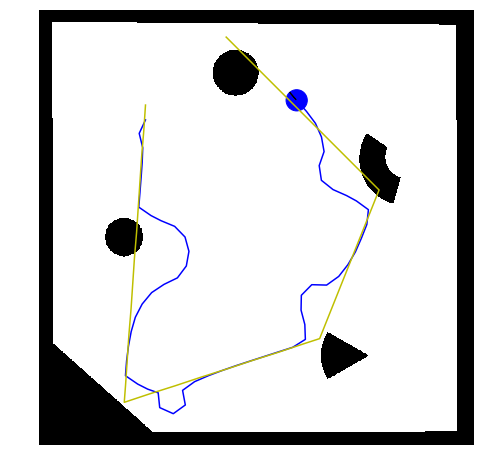

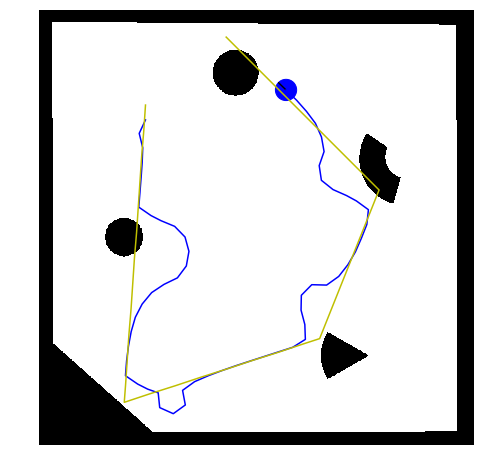

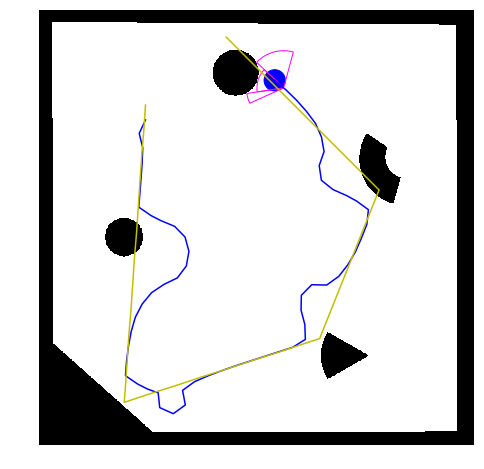

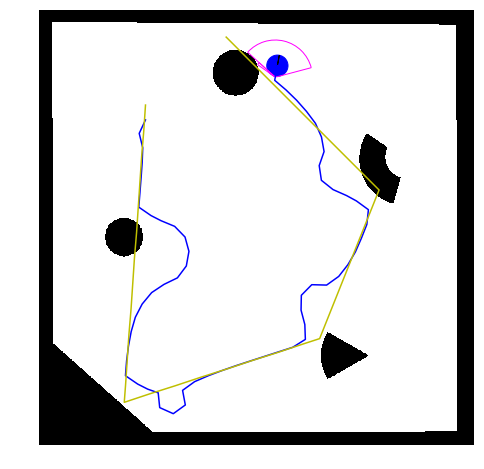

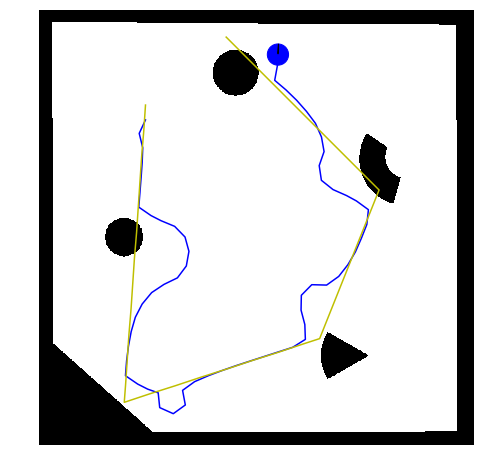

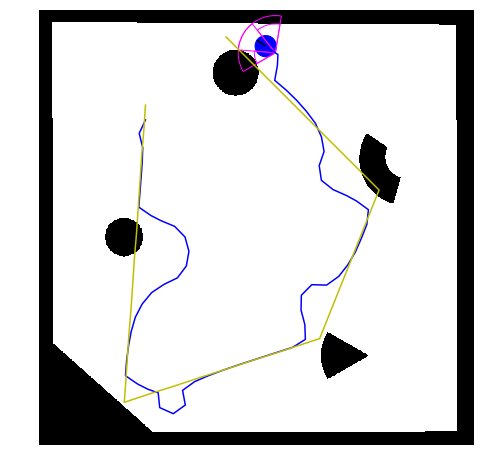

In [41]:
full = np.concatenate((AB,BC,CD,DE),axis=0)
#robot = Robot(*(A),4.7,20,0,0.8,0)

#robot = Robot(626.4324691367921, 248.21824382060316, 6.842399164334139-2*np.pi,40,0,1.13,0)
#robot = Robot(600,600, 2*np.pi+1,35,0,1.13,0)
robot = Robot(*A,3*np.pi/2,35,0,1.13,0)

#robot = Robot(*(250,600),3.14,20,0,1,0)

robot.set_environment(obstacles)
log = []

fig,ax = plt.subplots(figsize=(8,8))
ax. set_aspect('equal')
ax.set_xlim([0, 1024])
ax.set_ylim([0, 1024])
ax.imshow(arena,cmap = plt.cm.gray_r,origin = 'lower')
traj = []
path = full #AABB #PQ #np.array([[200,800-i*12,np.pi/2] for i in range(55)])
x,y,t = path.T
tracker = PurePursuitTracker(x,y,35,lookahead=130) 
pose = [robot.x_bot,robot.y_bot,robot.yaw] #arbitrary initial pose
# robot.plot(ax)
robot.plot_interval(ax)
i = 0
while True:
    try:
        #print("v = ",tracker.v," w = ",tracker.w)

          
#         plt.clf()
        clear_output(wait = True)
        fig,ax = plt.subplots(figsize=(8,8))
        ax. set_aspect('equal')
        ax.set_xlim([0, 1024])
        ax.set_ylim([0, 1024])
        ax.imshow(arena,cmap = plt.cm.gray_r,origin = 'lower')
        plt.axis("off")
        
        robot.plot(ax)
        traced = np.array(traj).T    
        if len(traced):
            ax.plot(traced[0],traced[1],'b-') 
        pathx = np.array(path).T    
        ax.plot(pathx[0],pathx[1],'y-')
        nex_bot,is_collide = robot.next_bot(tracker.v,tracker.w,ax)
        #nex_bot,is_collide = robot.next_pose(tracker.v,tracker.w),False
        pose = [robot.x_bot,robot.y_bot,robot.yaw]
        traj.append([*pose, tracker.w, tracker.ref_idx])
        
        log.append(f'run {i} :'+repr(pose))
        if is_collide or i==0:# or i%5==0:
            tracker.revamp(pose[0],pose[1])
            
        if tracker.update(*pose): 
            print("ARRIVED!!") 
            plt.savefig("captures2/fig70.png")
            plt.savefig("captures2/fig70w.png")
            break
         
        robot = nex_bot
        i+=1
        print("run : ",i)
        
        if i == 150:
            break
        plt.savefig(f"captures2/fig{i}.png")
        plt.savefig(f"captures2/fig{i}a.png")
        #plt.pause(0.5)    
    except KeyboardInterrupt:
        try:
            break
        except GeometryError:
            break
plt.show()        
# clear_output(wait = True)    
# fig,ax = plt.subplots(figsize=(8,8))
# ax. set_aspect('equal')
# ax.set_xlim([0, 1024])
# ax.set_ylim([0, 1024])
# ax.imshow(arena,cmap = plt.cm.gray_r,origin = 'lower')

# plt.annotate("A",A)
# plt.annotate("B",B)        
# traced = np.array(traj).T    
# ax.plot(traced[0],traced[1],'b-') 
# path = np.array(path).T    
# ax.plot(path[0],path[1],'y-')
# plt.show()

In [33]:
log

['run 0 :[250.0, 765.0, 4.71238898038469]',
 'run 1 :[235.19297294000413, 733.286407493875, 4.2755715076857825]',
 'run 2 :[243.53318934076987, 699.2946321594151, 4.9529956842683465]',
 'run 3 :[242.1861156156102, 664.3205647325489, 4.673891651245603]',
 'run 4 :[239.68717676520214, 629.409888648836, 4.640929926666347]',
 'run 5 :[236.98243867495475, 594.514553833661, 4.635033625160277]',
 'run 6 :[234.1758122524873, 559.6272660611112, 4.63211346377801]',
 'run 7 :[262.98577652142, 539.7530123940468, 5.6793110149746076]',
 'run 8 :[286.3539777853003, 527.7951835906734, 5.810210708874182]',
 'run 9 :[318.66816046725756, 514.3492326166034, 5.888876608863256]',
 'run 10 :[343.0733750588568, 489.2616759253273, 5.484001314957408]',
 'run 11 :[352.30809474359677, 455.5019372956478, 4.9793995611125865]',
 'run 12 :[346.1095344971842, 421.05519795980365, 4.534348142963905]',
 'run 13 :[325.1220957322992, 393.04578143445985, 4.069336411700683]',
 'run 14 :[293.63290730143063, 377.7673321687375,

In [37]:
!pip install imageio

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.3 MB 1.4 MB/s eta 0:00:01     |████                            | 419 kB 731 kB/s eta 0:00:04
     |████████████████████████████████| 3.1 MB 1.5 MB/s eta 0:00:01     |████████▊                       | 839 kB 885 kB/s eta 0:00:03     |█████████▋                      | 921 kB 885 kB/s eta 0:00:03     |██████████████████████████████▎ | 2.9 MB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [43]:
import imageio
images = []
for i in range(1,66,1):
    filename = f'captures2/fig{i}.png'
    filename1 = f'captures2/fig{i}a.png'
    #print(filename)
    images.append(imageio.imread(filename))
    images.append(imageio.imread(filename1))
imageio.mimsave('simul.gif', images)